# Section B - Luke Kennedy
---

1.<a href='#importingpackages'>Importing Used Packages</a>
        
2.<a href='#importingdata'>Importing the Data</a>
        
3.<a href='#addnan'>Adding NaN Values</a>
        
4.<a href='#dataanal'>Exploratory Data Analysis</a>
        
5.<a href='#split'>Splitting Test and Train Data</a>
        
6.<a href='#scale'>Scaling and Imputing NaN Values</a>
        
7.<a href='#model'>Training and Testing Models</a>

7.1 <a href='#modelreg'>Training and Testing Regression</a>
7.2 <a href='#modelclass'>Training and Testing Classification</a>
7.3 <a href='#modelnn'>Training and Testing Neural Network</a>
7.4 <a href='#modeltest'>Evaluating Models</a>
        
8.<a href='#collab'>Predicting Collaboration Artist</a>

8.1 <a href='#collabcluster'>Clustering Songs for Collaboration</a>
8.2 <a href='#collabevaluate'>Evaluating Collaboration Artists</a>
        
9.<a href='#monthtitle'>Affect of Month and Title Size</a>
</ol>

# Importing Used Packages

<a id='importingpackages'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from missing_data_functions import add_nans_to_df
import shap
import xgboost as xgb
import tensorflow as tf
import nltk

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, r2_score

# Importing the Data

<a id='importingdata'></a>

In [3]:
#Reading in the data
spotify_data = pd.read_csv("data.csv")
spotify_data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


# Adding NaNs

<a id='addnan'></a>

In [4]:
spotify_data_nans = add_nans_to_df(spotify_data)

In [5]:
spotify_data_nans.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333.0,0.224,0.0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5.0,0.3790,-12.628,0.0,Keep A Song In Your Soul,12.0,1920,0.0936,149.976,0.6340,1920.0
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200.0,0.517,0.0,0hbkKFIJm7Z05H8Zl9w30f,NaN,5.0,0.0809,-7.261,0.0,I Put A Spell On You,7.0,1920-01-05,0.0534,86.889,0.9500,NaN
2,0.993000,['Mamie Smith'],0.647,163827.0,0.186,0.0,11m7laMUgmOKqI3oYzuhne,0.000018,0.0,0.5190,-12.098,1.0,Golfing Papa,4.0,1920,0.1740,97.600,0.6890,1920.0
3,0.000173,['Oscar Velazquez'],0.730,422087.0,0.798,0.0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2.0,0.1280,-7.311,1.0,True House Music - Xavier Santos & Carlos Gomi...,17.0,1920-01-01,0.0425,127.997,0.0422,1920.0
4,0.295000,['Mixe'],0.704,165224.0,0.707,1.0,2hJjbsLCytGsnAHfdsLejp,0.000246,10.0,0.4020,-6.036,0.0,Xuniverxe,2.0,1920-10-01,0.0768,NaN,0.2990,1920.0


In [6]:
#Checking how many NaNs were added and the columns they were added to
spotify_data_nans.isna().sum()

acousticness        8719
artists                0
danceability        8719
duration_ms         8719
energy              8719
explicit            8719
id                     0
instrumentalness    8719
key                 8719
liveness            8719
loudness            8719
mode                8719
name                   0
popularity          8719
release_date           0
speechiness         8719
tempo               8719
valence             8719
year                8719
dtype: int64

# Exploratory Data Analysis

<a id='dataanal'></a>

In [7]:
spotify_data_nans.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,165670.000000,165670.00000,1.656700e+05,165670.000000,165670.000000,165670.000000,165670.000000,165670.000000,165670.000000,165670.000000,165670.000000,165670.000000,165670.000000,165670.000000,165670.000000
mean,0.498874,0.53672,2.328319e+05,0.482846,0.068178,0.197309,5.205004,0.211045,-11.750543,0.702783,25.691296,0.105764,116.988013,0.524523,1977.061810
std,0.379963,0.17613,1.480336e+05,0.272672,0.252051,0.334547,3.518524,0.180408,5.685979,0.457034,21.881237,0.182314,30.253461,0.264540,26.913243
min,0.000000,0.00000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087500,0.41400,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.904750,0.000000,1.000000,0.035200,93.914000,0.310000,1955.000000
50%,0.516000,0.54800,2.057895e+05,0.465000,0.000000,0.000525,5.000000,0.138000,-10.840000,1.000000,25.000000,0.045500,115.803000,0.536000,1977.000000
75%,0.895000,0.66900,2.656930e+05,0.711000,0.000000,0.253000,8.000000,0.270000,-7.498250,1.000000,42.000000,0.076300,135.008750,0.744000,1999.000000
max,0.996000,0.98800,5.042185e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


I created two dataframes from the original data, df: had all the data we were going to use for our modelling, df_artists: had all the data we were going to use along with the names of the artists for use in finding a good collaboration.

In [8]:
#Creating sub dataframes of the data with all the test characteristics for plotting exploratory graphs
#df_artists is created as artist name is needed when recommending collaboration even though not used in predicting popularity
df = spotify_data_nans.drop(["artists", "id", "key", "name", "release_date"], axis=1)
df_artists = spotify_data_nans.drop(["id", "key", "name", "release_date"], axis=1)
df.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
0,0.991000,0.598,168333.0,0.224,0.0,0.000522,0.3790,-12.628,0.0,12.0,0.0936,149.976,0.6340,1920.0
1,0.643000,0.852,150200.0,0.517,0.0,NaN,0.0809,-7.261,0.0,7.0,0.0534,86.889,0.9500,NaN
2,0.993000,0.647,163827.0,0.186,0.0,0.000018,0.5190,-12.098,1.0,4.0,0.1740,97.600,0.6890,1920.0
3,0.000173,0.730,422087.0,0.798,0.0,0.801000,0.1280,-7.311,1.0,17.0,0.0425,127.997,0.0422,1920.0
4,0.295000,0.704,165224.0,0.707,1.0,0.000246,0.4020,-6.036,0.0,2.0,0.0768,NaN,0.2990,1920.0


Looking at the correlation matrix we can see that popularity has a few links to acousticness, energy, loudness, speechiness, and year. This indicates perhaps we can use a regression algorithm to model popularity. There's also the understandable correlations between danceability and valence, and energy and loudness. It seems that there are also some strong yearly trends of acousticness decreasing, energy and loudness increasing and popularity increasing. These could be different to part A due to this considering the whole range of dates from 1920 to 2021 rather than 1990 to 2021.

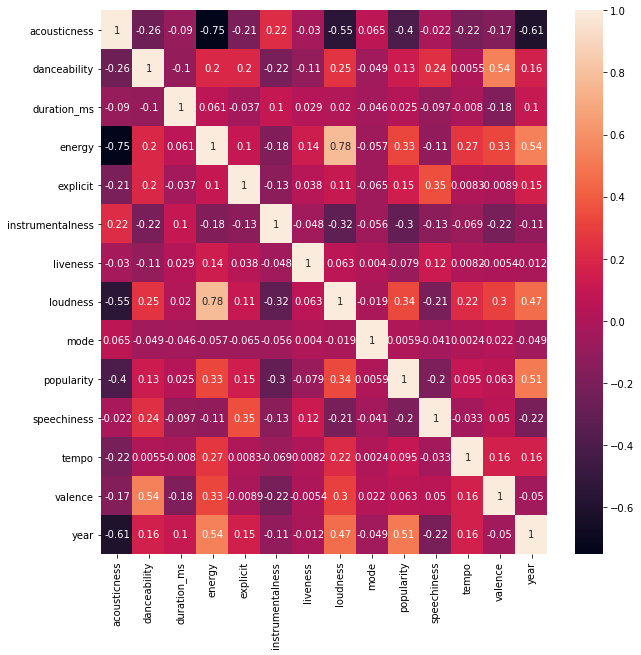

In [9]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns, annot = True)
plt.show()

Some of those weak correlations are repeated once again, the acousticness, loudness, and speechiness links particularly noticeable. However, no strong correlations between data.

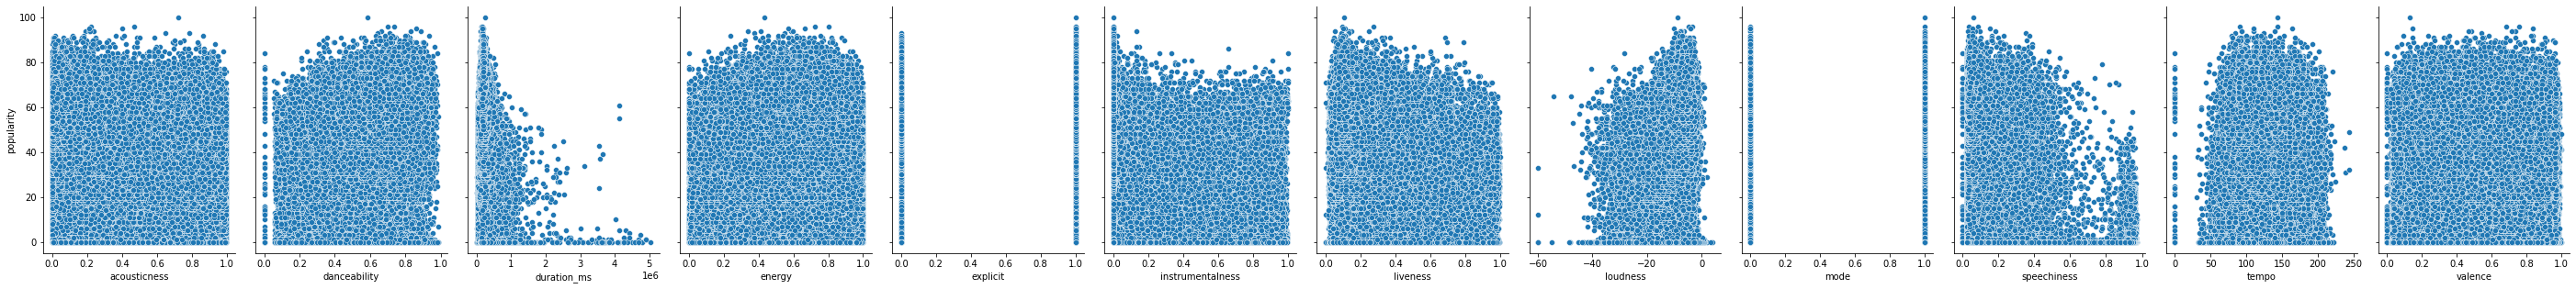

In [10]:
pairplot = sns.pairplot(data = df, y_vars = ["popularity"], x_vars = ["acousticness", "danceability", "duration_ms", "energy", "explicit", "instrumentalness", "liveness","loudness", "mode","speechiness", "tempo", "valence"])
pairplot.fig.set_size_inches(40,5)
plt.show()

I thought this was interesting, in that the vast majority of songs are clustered with a very low popularity but the popular songs are extremely popular. This could bring an argument for using classification as it does seem that the popularity is skewed very heavily towards being near zero. This could be simply because anyone can upload to spotify so a lot of smaller artists will have zero popularity compared to the mainstream artists. It could be interesting to look at a logarithmic scale of popularity to see if that produces a more normal distribution.

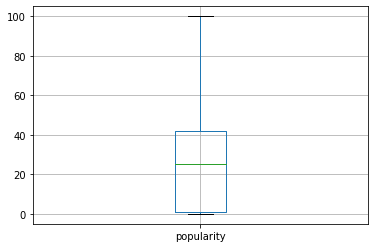

In [11]:
df.boxplot("popularity")
plt.show()

# Splitting Test and Train Data

<a id='split'></a>

In the end I decided on not using the name, the key, or the release date in my models.<br> I did not include the name as it would've been very difficult to encode and measure an effect from, however it could be interesting to see if length of name is a factor in popularity.<br> The key as that should largely have no causal affect on the popularity and may lead to overfitting, in theory this could be encoded using one hot encoding but I didn't see the need, also would be unable to be imputed as characteristics of the song have no bearing on the key it's in. <br> Lastly, I did not include the release date as for a lot of the songs we don't have the data so would have to drop a lot songs or assume they were released at an arbitrary date. In predicting the success of songs it may be interesting to see how month in particular plays into the popularity once removing the songs with no exact data, however this can be done separately in a plot so need not reduce the data for the model.

In [12]:
#Defining lists of features for use later
total_features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "liveness", "loudness", "popularity", "speechiness","tempo","valence","year","explicit","mode"]
test_features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "liveness", "loudness", "speechiness","tempo","valence","year","explicit","mode"]

Instead of attempting to impute popularity, and year, I decided it would be worth it to drop any NaN values from those columns. The popularity case is obvious as it doesn't make sense to try and predict a quantity you've already predicted from the data, and the year as it had by far the largest impact on the popularity so would be bad to be imputed as you are effectively deciding the population already in the imputing process to a large degree.

I made the decision to remove the data for the year 2021 for our predictions as the data is incomplete in so far as the popularity of the songs released has not had the same chance to increase as for all the other years, meaning the mean popularity is significantly lower than all other recent years as of now. This is unlikely to just be a fact of music released in 2021 and much more likely to stem from our incomplete data so I will not be using it to train the model.

In [13]:
#Removing NaN values in the popularity and year columns for reasons described above
df_artists = df_artists.dropna(subset=["popularity"])
df_artists = df_artists.dropna(subset=["year"])
#Removing the data for 2021 for reasons described above
df_artists = df_artists.drop(df_artists[df_artists["year"] == 2021].index)

#Taking a random sample of 80% of the data for the training set and then taking the remaining data for the testing set
train_data = df_artists.sample(frac = 0.8, random_state = 69)
test_data = df_artists.drop(train_data.index)

#Splitting the training and testing data into the training variables and the testing variable (popularity)
train_x = train_data[test_features]
train_y = train_data["popularity"]

test_x = test_data[test_features]
test_y = test_data["popularity"]

#Displaying how many NaN values remain across all columns
df_artists.isna().sum()

acousticness        7768
artists                0
danceability        7796
duration_ms         7781
energy              7764
explicit            7781
instrumentalness    7807
liveness            7821
loudness            7774
mode                7798
popularity             0
speechiness         7794
tempo               7786
valence             7809
year                   0
dtype: int64

# Scaling and Imputing NaN Values

<a id='scale'></a>

I decided to use KNN imputing to fill in the rest of the missing data as if I were to drop all of it then we would have a substantially reduced dataset when a lot of the data we'd be losing would be quite valuable. Because of this, I had to scale the data before imputing with sensible values.

I did this using the sklearn standard scaler, separating out the popularity data and not scaling that as it was the testing variable. I first fitted the scaler on the training data and then transformed both the training and test data using this scaler.

I also scaled the actual (no NaNs) data using this scaler to get an idea of how effective the KNN imputing really was.

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
#Splitting the train and test data into numerical and categorical variables
train_continuous = train_x.drop(["explicit", "mode"], axis = 1)
train_binary = train_x[["explicit","mode"]]

test_continuous = test_x.drop(["explicit", "mode"], axis = 1)
test_binary = test_x[["explicit","mode"]]

In [16]:
#Fitting an sklearn scaler onto the training data to scale it so all values are similarly scaled (necessary for KNN imputing)
scaler = StandardScaler()
scaler.fit(train_continuous)
train_continuous = scaler.transform(train_continuous)
#Reforming the training data dataframe after the continuous variables have been imputed
features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "liveness", "loudness", "speechiness","tempo","valence","year"]
train_continuous_scaled = pd.DataFrame(data=train_continuous, columns= features)
train_binary.reset_index(drop = True, inplace = True)
train_scaled = pd.concat([train_continuous_scaled, train_binary], axis=1)
train_scaled

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,year,explicit,mode
0,0.525420,-0.326229,-0.502466,1.474875,-0.586243,0.145162,0.811583,0.318582,1.166033,1.189743,-0.322847,0.0,1.0
1,1.160476,-1.013627,1.619773,-1.050008,1.709933,-0.446718,-1.163049,-0.336240,0.454383,-0.748470,-0.960649,0.0,1.0
2,-1.306439,0.031673,0.350269,1.651286,NaN,-0.663002,1.106679,-0.351011,1.374234,1.269240,0.802687,0.0,1.0
3,-1.082509,1.218997,-0.308022,NaN,-0.586243,-0.568412,0.607177,0.061467,-0.394118,0.705190,1.478007,1.0,1.0
4,-0.362604,-1.479467,0.347489,-0.160602,2.193181,-0.474376,-0.775153,-0.180330,-0.142823,-1.323877,0.089849,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124585,1.197367,1.667795,-0.570231,-0.987529,-0.363529,0.305578,-0.166506,0.520991,NaN,0.572695,-1.485898,0.0,0.0
124586,0.398936,-0.110351,-0.694877,0.743504,-0.586243,2.617779,NaN,-0.142583,1.461810,1.193529,0.202402,0.0,1.0
124587,1.297500,1.792776,-0.483757,-1.130863,2.298235,-0.529691,-1.020685,1.089926,0.129854,1.556944,-1.823558,0.0,1.0
124588,-0.354699,-0.013775,0.165484,1.588807,-0.586217,0.045593,1.216703,-0.258559,-0.555259,0.186567,-0.022705,0.0,0.0


In [17]:
#Scaling the test set with the scaler trained on the training set and readding categorical variables
test_continuous = scaler.transform(test_continuous)
test_continuous_scaled = pd.DataFrame(data=test_continuous, columns= features)
test_binary.reset_index(drop = True, inplace = True)
test_scaled = pd.concat([test_continuous_scaled, test_binary], axis=1)
test_scaled

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,year,explicit,mode
0,1.292230,0.355489,-0.440404,-0.947101,-0.584676,0.925115,-0.148930,-0.066543,1.091973,0.413701,-2.123700,0.0,0.0
1,-0.541790,0.957672,-0.461687,0.828034,-0.585504,1.052341,1.009661,-0.158448,NaN,-0.854466,-2.123700,1.0,0.0
2,1.305406,-0.633001,-0.233022,-0.869921,1.811986,0.128567,0.054597,-0.361405,-0.431727,-0.180634,-2.123700,0.0,1.0
3,1.294865,-1.036351,NaN,-0.314962,2.187178,0.554499,-0.399384,-0.334052,-0.187239,0.156282,-2.123700,0.0,1.0
4,-1.306544,0.611133,0.488859,1.897526,0.842489,-0.590539,0.994898,-0.268953,0.234119,0.432629,-2.123700,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31143,-1.312974,1.167869,0.527187,0.589145,0.026071,-0.892563,0.405760,-0.197289,0.233690,1.670511,1.628078,0.0,1.0
31144,-1.121772,-0.172842,-0.700415,NaN,-0.586243,-0.302896,0.080257,0.624931,0.512613,-1.664579,1.628078,1.0,1.0
31145,-1.094631,0.781562,-0.747444,-0.020944,-0.586243,-0.452249,-0.017463,1.029750,0.765659,1.609942,1.628078,1.0,0.0
31146,-1.111232,1.645071,-0.146773,NaN,-0.586243,-0.697298,0.785044,1.899564,0.662716,-0.559191,1.628078,1.0,0.0


In [18]:
#Creating a true dataframe of the spotify data to see how successful the imputation was
spotify_data_cleaned = spotify_data.drop(["artists", "id", "key", "name", "release_date","popularity"], axis=1)
#Selecting all the elements of the training data
true_data = spotify_data_cleaned.iloc[train_data.index]
true_continuous = true_data.drop(["explicit", "mode"], axis = 1)
true_binary = true_data[["explicit","mode"]]

#Scaling this data using the scaler trained on the training set
true_continuous = scaler.transform(true_continuous)
features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "liveness", "loudness", "speechiness","tempo","valence","year"]
true_continuous_scaled = pd.DataFrame(data=true_continuous, columns= features)
true_binary.reset_index(drop = True, inplace = True)
true_scaled = pd.concat([true_continuous_scaled, true_binary], axis=1)

true_scaled

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,year,explicit,mode
0,0.525420,-0.326229,-0.502466,1.474875,-0.586243,0.145162,0.811583,0.318582,1.166033,1.189743,-0.322847,0,1
1,1.160476,-1.013627,1.619773,-1.050008,1.709933,-0.446718,-1.163049,-0.336240,0.454383,-0.748470,-0.960649,0,1
2,-1.306439,0.031673,0.350269,1.651286,-0.548123,-0.663002,1.106679,-0.351011,1.374234,1.269240,0.802687,0,1
3,-1.082509,1.218997,-0.308022,0.034185,-0.586243,-0.568412,0.607177,0.061467,-0.394118,0.705190,1.478007,1,1
4,-0.362604,-1.479467,0.347489,-0.160602,2.193181,-0.474376,-0.775153,-0.180330,-0.142823,-1.323877,0.089849,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124585,1.197367,1.667795,-0.570231,-0.987529,-0.363529,0.305578,-0.166506,0.520991,0.488951,0.572695,-1.485898,0,0
124586,0.398936,-0.110351,-0.694877,0.743504,-0.586243,2.617779,1.075922,-0.142583,1.461810,1.193529,0.202402,0,1
124587,1.297500,1.792776,-0.483757,-1.130863,2.298235,-0.529691,-1.020685,1.089926,0.129854,1.556944,-1.823558,0,1
124588,-0.354699,-0.013775,0.165484,1.588807,-0.586217,0.045593,1.216703,-0.258559,-0.555259,0.186567,-0.022705,0,0


In [19]:
#Creating a KNN imputer class and fitting it on the training data before imputing both the train and test set to fill in NaN entries
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 5, weights ="uniform")
imputer.fit(train_scaled)
train_scaled_imputed = imputer.transform(train_scaled)
test_scaled_imputed = imputer.transform(test_scaled)

As can be seen the accuracy is very close to the original data showing this worked well.

In [20]:
#Comparing our dataframe with the true values from the spotify dataframe to check how accurate our imputation was
accuracy = r2_score(true_scaled.values, train_scaled_imputed)
print(accuracy)

0.971344249139947


In [21]:
#Recreating dataframes from the imputed data and rounding any of the categorical variables that weren't imputed to 1 or 0
train_scaled_imputed_df = pd.DataFrame(data=train_scaled_imputed, columns= test_features)
test_scaled_imputed_df = pd.DataFrame(data=test_scaled_imputed, columns= test_features)

train_scaled_imputed_df = train_scaled_imputed_df.round({"explicit": 0, "mode": 0})
test_scaled_imputed_df = test_scaled_imputed_df.round({"explicit": 0, "mode": 0})

In [22]:
#Adding the popularity back to the dataframes for the test and train data after they've been processed
train_y.reset_index(drop = True, inplace = True)
test_y.reset_index(drop = True, inplace = True)
train_final = pd.concat([train_scaled_imputed_df, train_y], axis = 1)
test_final = pd.concat([test_scaled_imputed_df, test_y], axis = 1)

In [23]:
#Storing data as a .pkl file after it has been preprocessed since imputing takes a long time
train_final.to_pickle("Processed Data/train_final.pkl")
test_final.to_pickle("Processed Data/test_final.pkl")

In [134]:
#Reading in from that .pkl file before starting any modelling so we definitely have the cleaned and processed data
train_final = pd.read_pickle("Processed Data/train_final.pkl")
test_final = pd.read_pickle("Processed Data/test_final.pkl")

# Training and Testing Models

<a id='model'></a>

For classifying the most successful artist I could either use a regression model to predict the value of the artists popularity or set an arbitrary popularity as popular and then turn the problem into a classification problem. 

I chose to try both methods and aggregate them to get a more confident final prediction of the model. I ended up using the random forest and extra trees regression models as they had the lowest absolute error and highest r squared value and a random forest classifier as it had the highest precision. I also attempted a neural network to see if it would increase my precision and accuracy at all.

I thought precision to be particularly important as the company would not want a false positive and then end up wasting a lot of money on an artist.

In terms of feature importance, the most important feature was by far the year the song was released, but since that can't be changed the instrumentalness, energy, loudness, and acousticness seem to be the most important features in affecting popularity. So, songs with low acousticness, low instrumentalness, high energy, and high loudness seem to be successful.

In future, I would like to spend more time tuning the models and modifying the test data used to try and get more accurate predictions. For example, I could look only at songs from the last 30 years to get more relevant data or I could exclude the large number of songs with 0 popularity as they seem to be massively skewing the distribution of popularity.

### Regression Models

<a id='modelreg'></a>

1. First attempted to fit a lot of regression models using a sample of the data, found that the best three (Extra Trees, Random Forest, and Gradient Boosting) had mean absolute error of about 9, and r squared of around 0.6. 

2. Attempted to fit these models using the top 8 components to try and avoid overfitting, found extra trees to be the best with 8.35 MAE and 0.67 r squared, then random forest closely behind, then gradient boosting.

3. Tried to blend the three models to see if it decreased error, the result had errors roughly in line with the extra trees and random forest algorithm but was not improved but may still be useful in creating a group of predictions and checking if they are consistent.

In [135]:
#Creating a pycaret regression class to quickly test all common regression models using a sample to see which to fit the whole data on
from pycaret.regression import *

train_sample = train_final.sample(frac = 0.1, random_state = 69)
test_sample = test_final.sample(frac = 0.1, random_state = 69)

regression = setup(data = test_sample.append(train_sample, ignore_index = True), 
                   test_data = test_sample,
                   target = "popularity",
                   categorical_features = ["explicit", "mode"],
                   session_id = 100,
                   data_split_shuffle = False,
                   preprocess = False, 
                   normalize = False)

compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,9.1078,177.3028,13.3096,0.6319,0.9555,0.6890,0.9080
rf,Random Forest Regressor,9.1416,181.0657,13.4500,0.6240,0.9580,0.6896,2.2050
gbr,Gradient Boosting Regressor,9.6028,189.6393,13.7675,0.6062,1.0136,0.7180,0.8810
ada,AdaBoost Regressor,11.7239,240.7874,15.5133,0.5001,1.2220,0.9649,0.2570
knn,K Neighbors Regressor,11.0975,248.2340,15.7516,0.4845,1.1405,0.9163,0.0940
lar,Least Angle Regression,13.3556,302.2759,17.3828,0.3722,1.4061,1.2115,0.0200
br,Bayesian Ridge,13.3544,302.2762,17.3828,0.3722,1.4057,1.2112,0.0180
ridge,Ridge Regression,13.3555,302.2757,17.3828,0.3722,1.4061,1.2115,0.0180
lr,Linear Regression,13.3556,302.2759,17.3828,0.3722,1.4061,1.2115,0.4740
lasso,Lasso Regression,13.6653,311.2764,17.6402,0.3536,1.4291,1.2184,0.0190


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=100, verbose=0, warm_start=False)

In [136]:
#Creating a pycaret regression class with all the data for fitting the best models on
#I also use PCA in this setup to speed up fitting of models by only including the most impactful 8 columns
from pycaret.regression import *

regression_final = setup(data = test_final.append(train_final, ignore_index = True), 
                   test_data = test_final,
                   target = "popularity",
                   session_id = 100,
                   pca = True,
                   pca_components = 8,
                   ignore_low_variance = True,
                   data_split_shuffle = False,
                   preprocess = False, 
                   normalize = False)

,Description,Value
0,session_id,100
1,Target,popularity
2,Original Data,"(155738, 14)"
3,Missing Values,False
4,Numeric Features,11
5,Categorical Features,2
6,Transformed Train Set,"(155738, 13)"
7,Transformed Test Set,"(31148, 13)"
8,Shuffle Train-Test,False
9,Stratify Train-Test,False


In [137]:
rf = create_model("rf")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.5202,168.9944,12.9998,0.6973,0.7696,0.5417
1,8.8180,159.8380,12.6427,0.5881,1.0183,0.8014
2,8.3562,155.8913,12.4856,0.6747,0.8778,0.6240
3,8.3729,155.0474,12.4518,0.6750,0.8824,0.6185
4,8.2261,149.4338,12.2243,0.6882,0.8804,0.6742
5,8.3411,154.3977,12.4257,0.6758,0.8719,0.6527
6,8.3321,155.3220,12.4628,0.6716,0.8919,0.6324
7,8.2431,151.8819,12.3240,0.6801,0.8617,0.6260
8,8.4262,157.3459,12.5438,0.6672,0.8787,0.6498
9,8.2523,150.3945,12.2635,0.6858,0.8828,0.6575


In [138]:
et = create_model("et")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.4892,167.0292,12.9240,0.7008,0.7626,0.5440
1,8.7745,156.0695,12.4928,0.5979,1.0150,0.7977
2,8.3047,153.4642,12.3881,0.6797,0.8671,0.6318
3,8.3301,152.9661,12.3679,0.6794,0.8735,0.6163
4,8.2148,147.8795,12.1606,0.6915,0.8731,0.6674
5,8.3238,153.8479,12.4035,0.6769,0.8615,0.6447
6,8.3098,154.1267,12.4148,0.6741,0.8848,0.6270
7,8.2307,150.3784,12.2629,0.6832,0.8524,0.6263
8,8.3996,156.6574,12.5163,0.6686,0.8700,0.6406
9,8.2487,149.7049,12.2354,0.6873,0.8757,0.6626


In [139]:
gbr = create_model("gbr")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,9.6636,200.6282,14.1643,0.6406,0.8864,0.6316
1,9.6030,178.1441,13.3471,0.5410,1.1280,0.8879
2,9.3286,182.3677,13.5044,0.6194,0.9948,0.7156
3,9.3983,183.8731,13.5600,0.6146,1.0102,0.7172
4,9.3207,178.3973,13.3565,0.6278,1.0058,0.7579
5,9.2963,180.8329,13.4474,0.6203,0.9855,0.7408
6,9.4005,185.2739,13.6115,0.6083,1.0135,0.7184
7,9.2725,180.1854,13.4233,0.6205,0.9772,0.7045
8,9.3825,183.7672,13.5561,0.6113,0.9930,0.7331
9,9.2839,178.8792,13.3746,0.6263,1.0033,0.7557


In [140]:
blended_model = blend_models(estimator_list = [rf,et,gbr])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.7591,171.6811,13.1027,0.6924,0.7897,0.5578
1,8.9544,156.3688,12.5048,0.5971,1.0566,0.8214
2,8.5389,155.9178,12.4867,0.6746,0.9087,0.6458
3,8.5781,155.6083,12.4743,0.6739,0.9186,0.6378
4,8.4570,150.5426,12.2696,0.6859,0.9174,0.6879
5,8.5281,155.1204,12.4547,0.6743,0.9019,0.6686
6,8.5502,156.8258,12.5230,0.6684,0.9264,0.6480
7,8.4551,153.0012,12.3694,0.6777,0.8936,0.6403
8,8.6098,157.8412,12.5635,0.6661,0.9097,0.6634
9,8.4695,151.6279,12.3137,0.6833,0.9175,0.6799


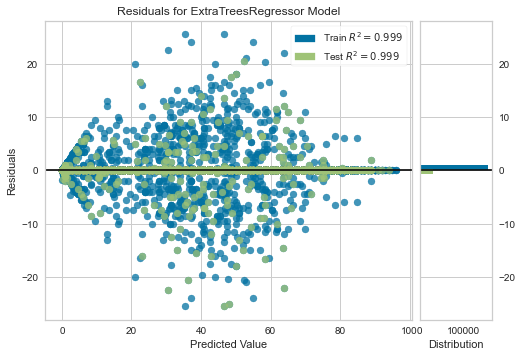

In [141]:
plot_model(et, plot = "residuals")

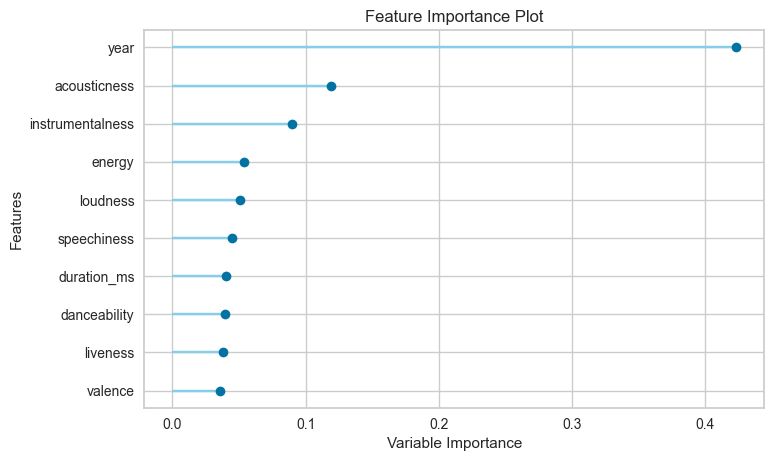

In [142]:
plot_model(et, plot = "feature")

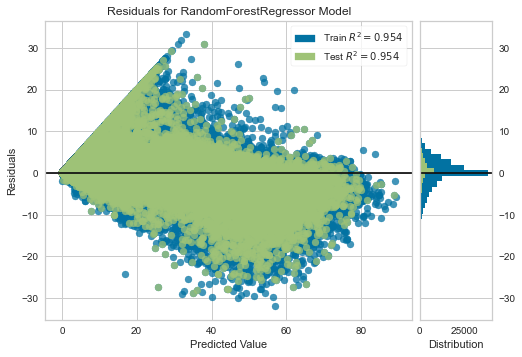

In [143]:
plot_model(rf, plot = "residuals")

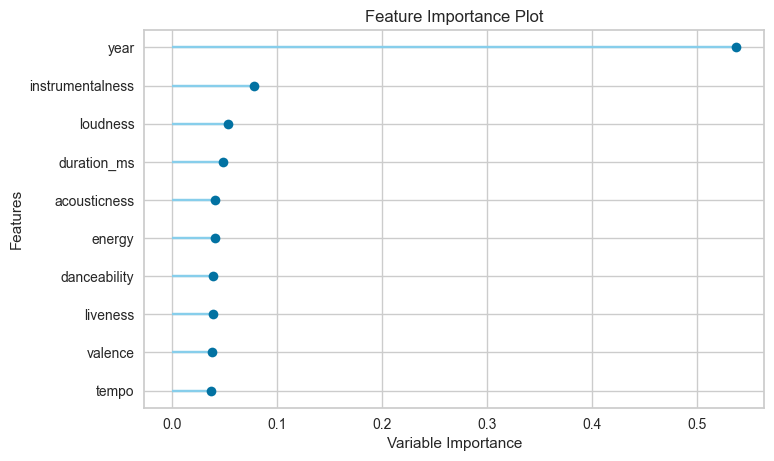

In [144]:
plot_model(rf, plot = "feature")

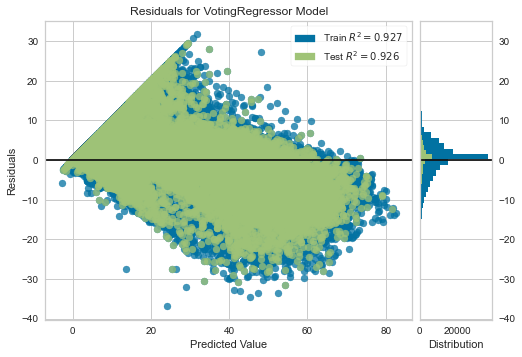

In [145]:
plot_model(blended_model, plot = "residuals")

In [146]:
#Finalizing the best two models found and training on the whole data
rf_final = finalize_model(rf)
et_final = finalize_model(et)

#### Creating Smaller Non-Optimized Model to View SHAP Scores

Since SHAP takes a long time to produce SHAP scores for larger input datasets, I had to use a separate model in order to reduce the input size of the data so it ran in a reasonable length of time.

In future I would prefer to finely tune this model so it was similar to the models I had generated above but I did not have time and the feature importances were largely aligned with the more complex models.

In [147]:
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [148]:
train_final_pop = train_final["popularity"]
train_final_nopop = train_final.drop(["popularity"], axis = 1)

test_final_pop = test_final["popularity"]
test_final_nopop = test_final.drop(["popularity"], axis = 1)

tn_f_np_s = train_final_nopop.sample(frac = 0.001, random_state = 2)

In [149]:
et_shap_reg = ExtraTreeRegressor(random_state=0).fit(train_final_nopop,train_final_pop)
rf_shap_reg = RandomForestRegressor(random_state=1).fit(train_final_nopop,train_final_pop)

In [239]:
r2_et = et_shap_reg.score(test_final_nopop,test_final_pop)
print("R Squared Value for Extra Trees:", r2_et)

mae_et = mean_absolute_error(test_final_pop,et_shap_reg.predict(test_final_nopop))
print("MAE Value for Extra Trees:", mae_et)

r2_rf = rf_shap_reg.score(test_final_nopop,test_final_pop)
print("R Squared Value for Random Forest:", r2_rf)

mae_rf = mean_absolute_error(test_final_pop,rf_shap_reg.predict(test_final_nopop))
print("MAE Value for Random Forest:", mae_rf)

R Squared Value for Extra Trees: 0.3046258109407586
MAE Value for Extra Trees: 11.12673800225111
R Squared Value for Random Forest: 0.6696377433355847
MAE Value for Random Forest: 8.400350744680615


In [151]:
shap_values_et = shap.TreeExplainer(et_final).shap_values(tn_f_np_s)
shap_values_rf = shap.TreeExplainer(rf_shap_reg).shap_values(tn_f_np_s)

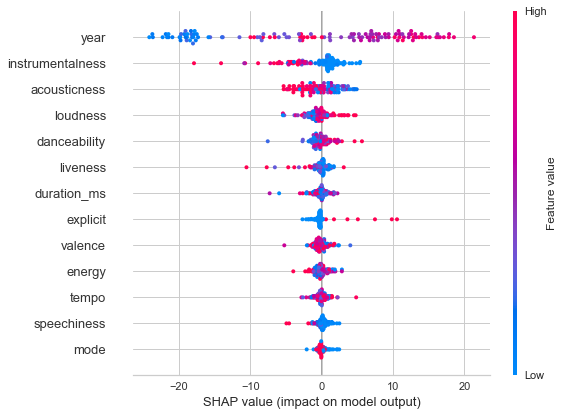

In [152]:
shap.summary_plot(shap_values_et, tn_f_np_s)

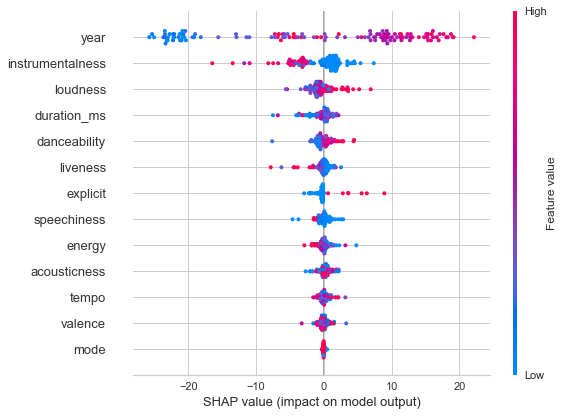

In [153]:
shap.summary_plot(shap_values_rf, tn_f_np_s)

In [154]:
test_final

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,year,explicit,mode,popularity
0,1.292230,0.355489,-0.440404,-0.947101,-0.584676,0.925115,-0.148930,-0.066543,1.091973,0.413701,-2.123700,0.0,0.0,12.0
1,-0.541790,0.957672,-0.461687,0.828034,-0.585504,1.052341,1.009661,-0.158448,0.201006,-0.854466,-2.123700,1.0,0.0,2.0
2,1.305406,-0.633001,-0.233022,-0.869921,1.811986,0.128567,0.054597,-0.361405,-0.431727,-0.180634,-2.123700,0.0,1.0,9.0
3,1.294865,-1.036351,-0.157028,-0.314962,2.187178,0.554499,-0.399384,-0.334052,-0.187239,0.156282,-2.123700,0.0,1.0,0.0
4,-1.306544,0.611133,0.488859,1.897526,0.842489,-0.590539,0.994898,-0.268953,0.234119,0.432629,-2.123700,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31143,-1.312974,1.167869,0.527187,0.589145,0.026071,-0.892563,0.405760,-0.197289,0.233690,1.670511,1.628078,0.0,1.0,0.0
31144,-1.121772,-0.172842,-0.700415,0.196630,-0.586243,-0.302896,0.080257,0.624931,0.512613,-1.664579,1.628078,1.0,1.0,0.0
31145,-1.094631,0.781562,-0.747444,-0.020944,-0.586243,-0.452249,-0.017463,1.029750,0.765659,1.609942,1.628078,1.0,0.0,0.0
31146,-1.111232,1.645071,-0.146773,0.306152,-0.586243,-0.697298,0.785044,1.899564,0.662716,-0.559191,1.628078,1.0,0.0,0.0


In [155]:
from pycaret.regression import *

regression_final = setup(data = train_final, 
                   target = "popularity",
                   session_id = 100,
                   pca = True,
                   pca_components = 8,
                   ignore_low_variance = True,
                   data_split_shuffle = False,
                   preprocess = False, 
                   normalize = False)

et_check = create_model("et")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.5488,160.6063,12.6731,0.6622,0.9004,0.6918
1,8.4717,162.8449,12.7611,0.6635,0.8920,0.6120
2,8.6462,162.0764,12.7309,0.6642,0.9000,0.6296
3,8.4154,154.2373,12.4192,0.6702,0.8897,0.6408
4,8.3911,153.6933,12.3973,0.6817,0.8994,0.6620
5,8.3384,155.5742,12.4729,0.6718,0.8951,0.6869
6,8.6245,162.1622,12.7343,0.6614,0.8944,0.6778
7,8.4043,155.2622,12.4604,0.6696,0.8994,0.6547
8,8.4884,158.5714,12.5925,0.6686,0.9060,0.6311
9,8.5901,165.4313,12.8620,0.6544,0.8935,0.6940


In [156]:
from pycaret.regression import *

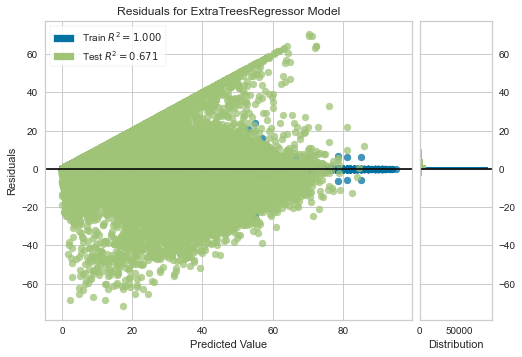

In [157]:
plot_model(et_check, plot = "residuals")

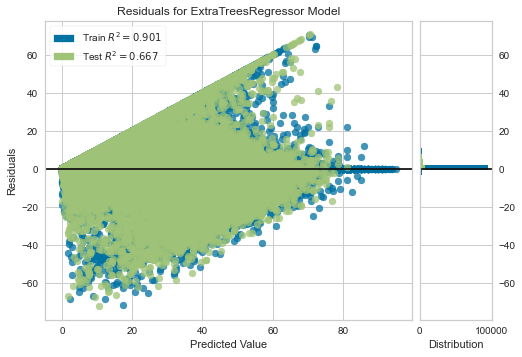

<AxesSubplot:title={'center':'Residuals for ExtraTreesRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [158]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(et_check, is_fitted = True)

visualizer.fit(train_final_nopop, train_final_pop)
visualizer.score(test_final_nopop, test_final_pop)  
visualizer.show()

In [159]:
train_final_pop

0         19.0
1          0.0
2         64.0
3         69.0
4         44.0
          ... 
124585     0.0
124586    47.0
124587     0.0
124588    28.0
124589    39.0
Name: popularity, Length: 124590, dtype: float64

In [160]:
et_check_final = finalize_model(et_check)

In [161]:
rsquared_et = r2_score(test_final_pop, et_check_final.predict(test_final_nopop))
rsquared_et

0.674576230501502

In [162]:
mae_et = mean_absolute_error(test_final_pop, et_check_final.predict(test_final_nopop))
mae_et

8.362684496156238

In [163]:
mse_et = mean_squared_error(test_final_pop, et_check_final.predict(test_final_nopop))
mse_et

155.3589485788716

### Classification Models

<a id='modelclass'></a>

Since all the regression algorithms had a relatively high error (around MAE 8-9), I attempted to fit classification algorithms to classify whether a song would be in the top 25th percentile of popularity or not. In addition, the large number of zero popularity songs may be affecting the regression algorithms and this should mitigate that.

1. Fitted the classification models and found that gradient boosting classifier had the best accuracy and auc and extra trees classifier had the best precision which is an important quantity for this problem.

2. Fitted the gradient boosting classifier and extra trees model to all the data and found extra trees model to improve quite a lot giving it a much better precision than the gradient boosting model which is likely important as in this case false positives have the potential to be a lot more damaging than false negatives.

3. I also attempted a blended model of these two classifiers but it did not improve upon the random forest model I had used previously and had lower precision so it was ultimately not a better model.

In [164]:
#Finding quartiles along with the 90th percentile to see where to categorise the popularity of a song (1 or 0)
train_final.popularity.quantile([0.25,0.5,0.75,0.9])

0.25     1.0
0.50    26.0
0.75    42.0
0.90    56.0
Name: popularity, dtype: float64

In [165]:
#Creating a copy of the data which will have the categorical popularity data
train_final_binarypop = train_final
test_final_binarypop = test_final

In [166]:
#Converting the popularity to a categorical variable
train_final_binarypop.loc[train_final_binarypop["popularity"] < 42, "popularity"] = 0
train_final_binarypop.loc[train_final_binarypop["popularity"] >= 42, "popularity"] = 1

test_final_binarypop.loc[test_final_binarypop["popularity"] < 42, "popularity"] = 0
test_final_binarypop.loc[test_final_binarypop["popularity"] >= 42, "popularity"] = 1

In [167]:
#Initialising a classification class from pycaret on a sample of the data to quickly see how good certain models are
from pycaret.classification import *

train_sample_binary = train_final_binarypop.sample(frac = 0.1, random_state = 69)
test_sample_binary = test_final_binarypop.sample(frac = 0.1, random_state = 69)

classification_sampled = setup(data = test_sample_binary.append(train_sample_binary, ignore_index = True), 
                   test_data = test_sample_binary,
                   target = "popularity",
                   categorical_features = ["explicit", "mode"],
                   session_id = 100,
                   data_split_shuffle = False,
                   preprocess = False, 
                   normalize = False)

#Comparing all common classification algorithms
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8236,0.8696,0.5363,0.7292,0.6179,0.5067,0.5169,0.8940
et,Extra Trees Classifier,0.8224,0.8681,0.5312,0.7280,0.6140,0.5024,0.5130,0.5990
gbc,Gradient Boosting Classifier,0.8200,0.8730,0.5469,0.7105,0.6179,0.5028,0.5103,1.3630
ada,Ada Boost Classifier,0.8080,0.8560,0.5501,0.6704,0.6039,0.4789,0.4832,0.6480
lr,Logistic Regression,0.7802,0.8207,0.4405,0.6237,0.5159,0.3793,0.3891,0.0270
knn,K Neighbors Classifier,0.7773,0.7987,0.5450,0.5885,0.5657,0.4163,0.4170,0.2210
svm,SVM - Linear Kernel,0.7771,0.0000,0.3998,0.6362,0.4832,0.3525,0.3713,0.0350
lda,Linear Discriminant Analysis,0.7750,0.8178,0.4133,0.6157,0.4940,0.3566,0.3686,0.0340
ridge,Ridge Classifier,0.7701,0.0000,0.3445,0.6238,0.4431,0.3133,0.3356,0.0220
dt,Decision Tree Classifier,0.7500,0.6848,0.5450,0.5297,0.5370,0.3659,0.3661,0.0580


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=100, verbose=0,
                       warm_start=False)

In [168]:
#Creating a new classification class with all the data for fitting the good models on as determined above

from pycaret.classification import *

classification_final = setup(data = test_final.append(train_final, ignore_index = True), 
                   test_data = test_final,
                   target = "popularity",
                   categorical_features = ["explicit", "mode"],
                   session_id = 100,
                   data_split_shuffle = False,
                   preprocess = False, 
                   normalize = False)

et = create_model("et")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8036,0.8719,0.3690,0.7500,0.4946,0.3898,0.4276
1,0.8558,0.9152,0.7205,0.7244,0.7224,0.6250,0.6250
2,0.8381,0.8881,0.5563,0.7579,0.6416,0.5403,0.5510
3,0.8281,0.8824,0.5382,0.7312,0.6200,0.5122,0.5223
4,0.8334,0.8843,0.5508,0.7435,0.6328,0.5281,0.5381
5,0.8340,0.8818,0.5557,0.7423,0.6356,0.5309,0.5402
6,0.8379,0.8858,0.5601,0.7546,0.6430,0.5411,0.5512
7,0.8386,0.8873,0.5688,0.7513,0.6474,0.5453,0.5542
8,0.8330,0.8809,0.5556,0.7385,0.6341,0.5287,0.5377
9,0.8330,0.8835,0.5388,0.7499,0.6271,0.5232,0.5351


In [169]:
gbc_class = create_model("gbc")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7956,0.8690,0.3742,0.7018,0.4881,0.3748,0.4038
1,0.8515,0.9102,0.7291,0.7090,0.7189,0.6180,0.6181
2,0.8319,0.8839,0.5588,0.7325,0.6339,0.5274,0.5355
3,0.8240,0.8765,0.5545,0.7069,0.6215,0.5090,0.5154
4,0.8273,0.8803,0.5619,0.7143,0.6290,0.5185,0.5248
5,0.8288,0.8794,0.5574,0.7222,0.6292,0.5203,0.5277
6,0.8277,0.8797,0.5525,0.7209,0.6256,0.5162,0.5239
7,0.8277,0.8817,0.5611,0.7160,0.6292,0.5191,0.5256
8,0.8268,0.8770,0.5598,0.7135,0.6273,0.5166,0.5231
9,0.8242,0.8787,0.5462,0.7121,0.6182,0.5066,0.5141


In [170]:
rf_class = create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8070,0.8766,0.3818,0.7567,0.5075,0.4033,0.4398
1,0.8544,0.9174,0.7345,0.7145,0.7244,0.6254,0.6255
2,0.8383,0.8908,0.5669,0.7511,0.6462,0.5440,0.5530
3,0.8290,0.8843,0.5505,0.7270,0.6266,0.5184,0.5268
4,0.8383,0.8875,0.5737,0.7469,0.6489,0.5462,0.5542
5,0.8354,0.8855,0.5614,0.7440,0.6399,0.5359,0.5448
6,0.8401,0.8894,0.5724,0.7547,0.6511,0.5499,0.5587
7,0.8382,0.8915,0.5771,0.7444,0.6502,0.5471,0.5546
8,0.8330,0.8855,0.5669,0.7318,0.6389,0.5326,0.5399
9,0.8351,0.8875,0.5539,0.7478,0.6364,0.5328,0.5428


In [171]:
#Creating a blended model of the extra trees and gradient boosting classifier to see if precision is raised
blended_class = blend_models(estimator_list = [rf_class,gbc_class])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8053,0.8756,0.3865,0.7428,0.5084,0.4018,0.4351
1,0.8551,0.9186,0.7392,0.7144,0.7266,0.6280,0.6282
2,0.8384,0.8913,0.5667,0.7520,0.6463,0.5443,0.5535
3,0.8289,0.8841,0.5577,0.7223,0.6294,0.5205,0.5279
4,0.8347,0.8876,0.5668,0.7381,0.6412,0.5362,0.5441
5,0.8339,0.8863,0.5636,0.7370,0.6387,0.5334,0.5415
6,0.8378,0.8885,0.5670,0.7495,0.6456,0.5431,0.5520
7,0.8358,0.8906,0.5739,0.7377,0.6456,0.5409,0.5481
8,0.8344,0.8853,0.5716,0.7339,0.6426,0.5370,0.5441
9,0.8339,0.8869,0.5583,0.7404,0.6366,0.5317,0.5406


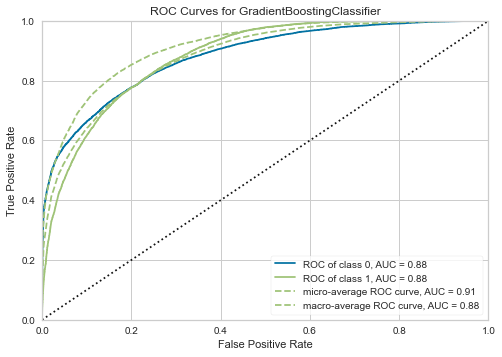

In [172]:
plot_model(gbc_class, "auc")

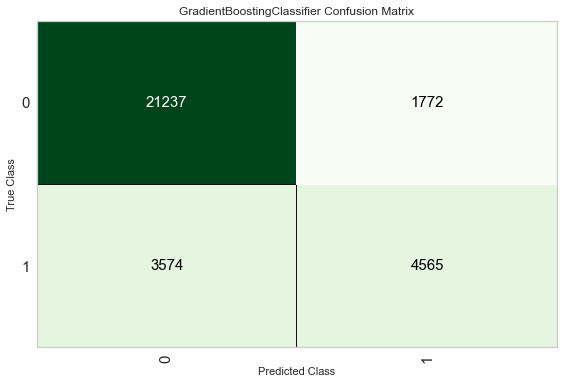

In [173]:
plot_model(gbc_class, "confusion_matrix")

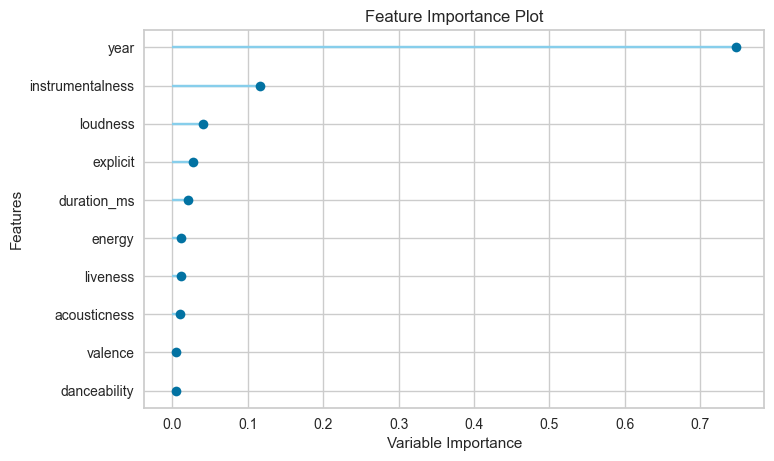

In [174]:
plot_model(gbc_class, plot="feature")

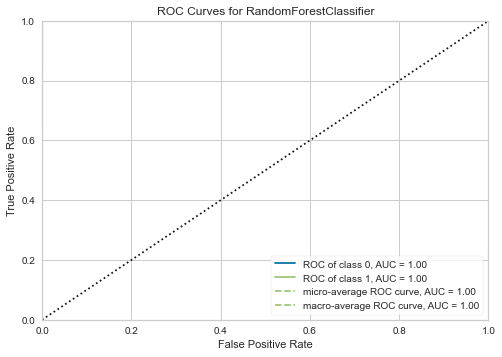

In [175]:
plot_model(rf_class, "auc")

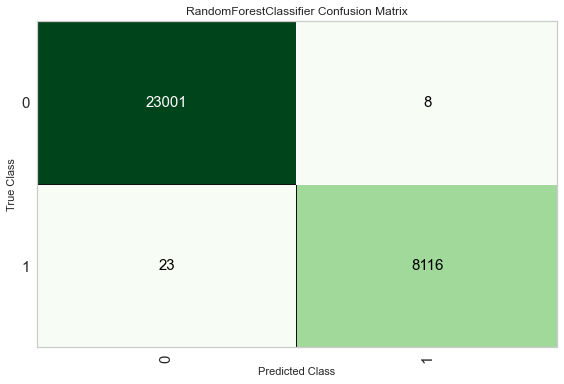

In [176]:
plot_model(rf_class, "confusion_matrix")

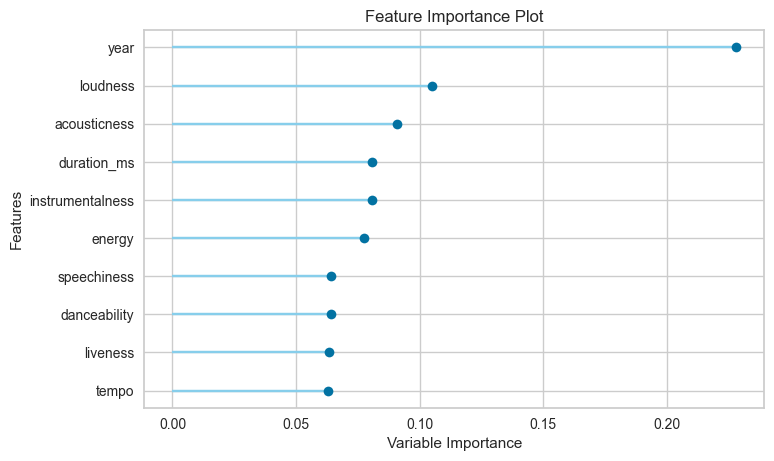

In [177]:
plot_model(rf_class, plot="feature")

In [178]:
#Finalizing the best model found
rf_class_final = finalize_model(rf_class)

#### Creating Smaller Non-Optimized Model to View SHAP Scores

Since SHAP takes a long time to produce SHAP scores for larger input datasets, I had to use a separate model in order to reduce the input size of the data so it ran in a reasonable length of time.

In future I would prefer to finely tune this model so it was similar to the models I had generated above but I did not have time and the feature importances were largely aligned with the more complex models.

In [179]:
from sklearn.ensemble import ExtraTreesClassifier

In [180]:
train_final_pop = train_final["popularity"]
train_final_nopop = train_final.drop(["popularity"], axis = 1)

test_final_pop = test_final["popularity"]
test_final_nopop = test_final.drop(["popularity"], axis = 1)

tn_f_np_s = train_final_nopop.sample(frac = 0.001, random_state = 2)

In [181]:
et_shap_class = ExtraTreesClassifier(random_state=0).fit(train_final_nopop,train_final_pop)

In [182]:
acc_et = et_shap_class.score(test_final_nopop,test_final_pop)
print("Accuracy for Extra Trees Classifier:", acc_et)

Accuracy for Extra Trees Classifier: 0.832124052908694


In [183]:
shap_values_et_class = shap.TreeExplainer(et_shap_class).shap_values(tn_f_np_s)

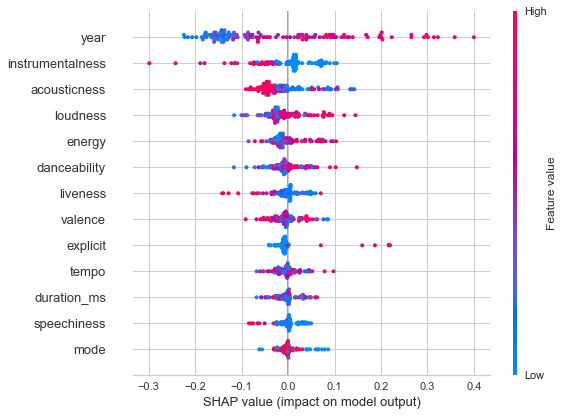

In [184]:
shap.summary_plot(shap_values_et_class[1], tn_f_np_s)

In [185]:
from pycaret.classification import *

classification_final = setup(data = train_final, 
                   target = "popularity",
                   categorical_features = ["explicit", "mode"],
                   session_id = 100,
                   data_split_shuffle = False,
                   preprocess = False, 
                   normalize = False)

rf_check = create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8348,0.8880,0.5469,0.7503,0.6327,0.5295,0.5405
1,0.8326,0.8863,0.5672,0.7292,0.6381,0.5314,0.5385
2,0.8265,0.8787,0.5437,0.7206,0.6198,0.5102,0.5187
3,0.8273,0.8797,0.5423,0.7244,0.6203,0.5115,0.5205
4,0.8365,0.8857,0.5670,0.7434,0.6433,0.5397,0.5481
5,0.8319,0.8865,0.5529,0.7351,0.6311,0.5251,0.5340
6,0.8304,0.8751,0.5516,0.7303,0.6285,0.5214,0.5300
7,0.8402,0.8868,0.5772,0.7506,0.6525,0.5510,0.5591
8,0.8379,0.8843,0.5573,0.7551,0.6413,0.5396,0.5500
9,0.8333,0.8867,0.5646,0.7333,0.6379,0.5320,0.5397


In [186]:
tuned_rf_check = tune_model(rf_check, n_iter = 20, optimize = "precision")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7901,0.8421,0.2636,0.7889,0.3951,0.3045,0.3718
1,0.7843,0.8383,0.2327,0.7904,0.3596,0.2736,0.3481
2,0.7841,0.8300,0.2407,0.7723,0.3671,0.2778,0.3468
3,0.7881,0.8323,0.2703,0.7605,0.3988,0.3039,0.3641
4,0.7918,0.8406,0.2668,0.7982,0.3999,0.3100,0.3785
5,0.7927,0.8391,0.2787,0.7861,0.4115,0.3187,0.3821
6,0.7903,0.8285,0.2672,0.7840,0.3986,0.3069,0.3725
7,0.7902,0.8390,0.2443,0.8269,0.3771,0.2933,0.3727
8,0.7894,0.8379,0.2597,0.7885,0.3907,0.3006,0.3687
9,0.7895,0.8421,0.2613,0.7875,0.3925,0.3019,0.3695


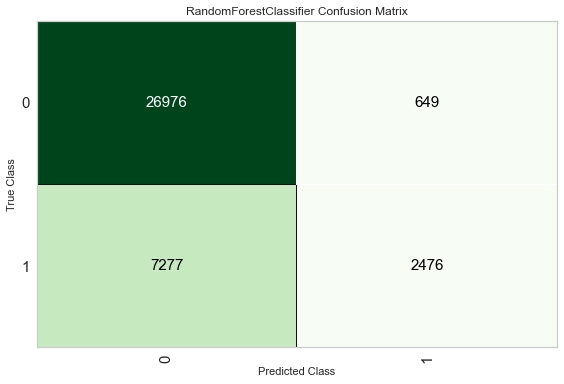

In [187]:
plot_model(tuned_rf_check, "confusion_matrix")

In [188]:
rf_check_final = finalize_model(tuned_rf_check)

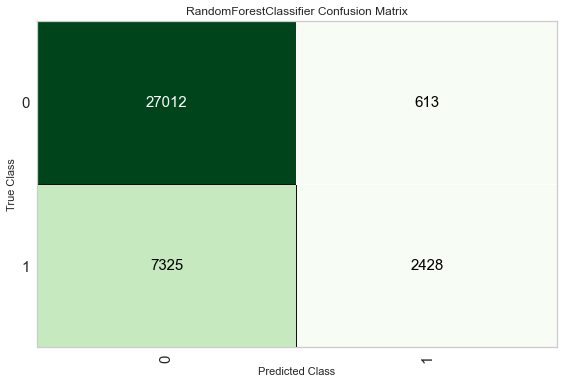

In [189]:
plot_model(rf_check_final, "confusion_matrix")

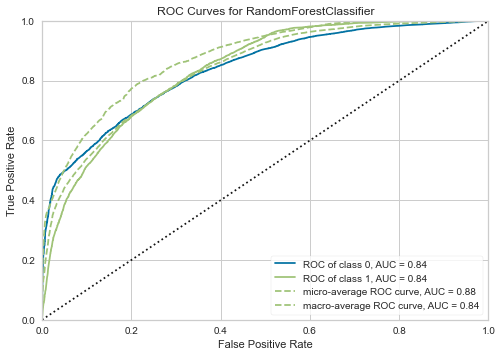

In [190]:
plot_model(rf_check_final)

### Neural Network

<a id='modelnn'></a>

Since it is useful to have a precise regression-type algorithm to measure roughly the popularity of songs I attempted fitting a neural network to try and get a lower error than my regression models had found so far

After fitting I found that the mean absolute error and mean squared error was only on par with my current regression models so wasn't an improvement though would still be a useful predictor to see if all models agree.

In [240]:
#Reread in data from .pkl files as we require actual population values rather than the categorical popular or not popular used for classification
train_final = pd.read_pickle("Processed Data/train_final.pkl")
test_final = pd.read_pickle("Processed Data/test_final.pkl")

In [192]:
#Separating popularity data from test and train data
train_final_pop = train_final["popularity"]
train_final_nopop = train_final.drop(["popularity"], axis = 1)

test_final_pop = test_final["popularity"]
test_final_nopop = test_final.drop(["popularity"], axis = 1)

In [193]:
#Initialising and training the neural network with the input data over 50 epochs
model = tf.keras.Sequential([
    tf.keras.layers.Dense(14, activation = "softmax", input_dim = 13),
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "relu")])

model.compile(optimizer = "adam", loss = "mse", metrics = ["mae", "mse"])

model.fit(train_final_nopop, train_final_pop, epochs = 35)

Epoch 1/35
3894/3894 [==============================] - 6s 1ms/step - loss: 662.0364 - mae: 19.2161 - mse: 662.0364
Epoch 2/35
3894/3894 [==============================] - 5s 1ms/step - loss: 219.0741 - mae: 10.5593 - mse: 219.0741
Epoch 3/35
3894/3894 [==============================] - 5s 1ms/step - loss: 196.2379 - mae: 9.7317 - mse: 196.2379
Epoch 4/35
3894/3894 [==============================] - 5s 1ms/step - loss: 190.4998 - mae: 9.4263 - mse: 190.4998
Epoch 5/35
3894/3894 [==============================] - 5s 1ms/step - loss: 189.5793 - mae: 9.3233 - mse: 189.5793
Epoch 6/35
3894/3894 [==============================] - 5s 1ms/step - loss: 186.7830 - mae: 9.2226 - mse: 186.7830
Epoch 7/35
3894/3894 [==============================] - 5s 1ms/step - loss: 185.3206 - mae: 9.1417 - mse: 185.3206
Epoch 8/35
3894/3894 [==============================] - 5s 1ms/step - loss: 185.5289 - mae: 9.1233 - mse: 185.5289
Epoch 9/35
3894/3894 [==============================] - 5s 1ms/step - loss: 18

In [194]:
#Evaluating the neural network over the test data
model.evaluate(test_final_nopop, test_final_pop)

974/974 [==============================] - 1s 974us/step - loss: 179.1455 - mae: 8.8363 - mse: 179.1455


[179.14547729492188, 8.836322784423828, 179.14547729492188]

In [195]:
#Calculating the r squared score of the neural network
r2_score(test_final_pop, model.predict(test_final_nopop))

0.6247516120245213

### Evaluating the Models

<a id='modeltest'></a>

Using all the models I have created so far I predicted the popularity of each of the artists and found Elliot Tempest to be consistently the most popular with projected popularity ranging from around 30 to 40 points, followed by Amy Apollo and then finally Pocket Rockets. This indicates strongly that Elliot Tempest is the correct choice to make.

Both my regression algorithm predictions were close and the classification algorithm predicted Elliot Tempest as the only popular one which matches the regression predictions.

The neural network predicts slightly lower popularities than the regression algorithms but agrees with the general order of popularity, placing Elliot Tempest first, Amy Apollo second, and Pocket Rockets third.

In [196]:
#Initialising dataframe to store the three potential artist data
predict_df_unscaled = pd.DataFrame(columns = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness","liveness","loudness","speechiness","tempo","valence","year"])
predict_df_binary = pd.DataFrame(columns = ["explicit", "mode"])

#Inputting the data for each of the artists into the new dataframe (assuming a 2021 release)
#Splitting the data into the categorical features and numerical features so numerical features can be scaled
e_tempest = {"acousticness":0.15, "danceability":0.4, "duration_ms":259000, "energy":0.8, "instrumentalness":0.03, "liveness":0.36, "loudness":-5, "speechiness":0.06, "tempo":127, "valence":0.5, "year":2021}
e_tempest_binary = {"explicit":1, "mode":1}

a_apollo = {"acousticness":0.3, "danceability":0.55, "duration_ms":230000, "energy":0.57, "instrumentalness":0.05, "liveness":0.13, "loudness":-7, "speechiness":0.05, "tempo":123, "valence":0.4, "year":2021}
a_apollo_binary = {"explicit":0, "mode":1}

p_rockets = {"acousticness":0.24, "danceability":0.47, "duration_ms":244000, "energy":0.7, "instrumentalness":0.2, "liveness":0.27, "loudness":-10, "speechiness":0.1, "tempo":128, "valence":0.6, "year":2021}
p_rockets_binary = {"explicit":0, "mode":1}

predict_df_unscaled = predict_df_unscaled.append([e_tempest,a_apollo,p_rockets], ignore_index = True)
predict_df_binary = predict_df_binary.append([e_tempest_binary, a_apollo_binary, p_rockets_binary], ignore_index = True)

#Scaling the numerical features and making the final prediction dataframe
predict_df = scaler.transform(predict_df_unscaled)
predict_df = pd.DataFrame(data=predict_df, columns= features)
predict_df = pd.concat([predict_df, predict_df_binary], axis=1)

predict_df

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,year,explicit,mode
0,-0.923877,-0.769345,0.180271,1.169831,-0.496197,0.820015,1.191746,-0.250353,0.332668,-0.093566,1.665596,1,1
1,-0.528614,0.082802,-0.018253,0.324528,-0.436166,-0.452249,0.840231,-0.305058,0.200477,-0.472123,1.665596,0,1
2,-0.686719,-0.371676,0.077586,0.802308,0.014065,0.322172,0.312960,-0.031532,0.365716,0.284991,1.665596,0,1


In [197]:
#Generating the predictions for the regression models and then displaying them
predictions_rf = predict_model(rf_final, data = predict_df)
predictions_et = predict_model(et_final, data = predict_df)
predictions_et_check = predict_model(et_check_final, data = predict_df)

In [198]:
predictions_rf

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,year,explicit,mode,Label
0,-0.923877,-0.769345,0.180271,1.169831,-0.496197,0.820015,1.191746,-0.250353,0.332668,-0.093566,1.665596,1,1,57
1,-0.528614,0.082802,-0.018253,0.324528,-0.436166,-0.452249,0.840231,-0.305058,0.200477,-0.472123,1.665596,0,1,17
2,-0.686719,-0.371676,0.077586,0.802308,0.014065,0.322172,0.312960,-0.031532,0.365716,0.284991,1.665596,0,1,11


In [199]:
predictions_et

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,year,explicit,mode,Label
0,-0.923877,-0.769345,0.180271,1.169831,-0.496197,0.820015,1.191746,-0.250353,0.332668,-0.093566,1.665596,1,1,48
1,-0.528614,0.082802,-0.018253,0.324528,-0.436166,-0.452249,0.840231,-0.305058,0.200477,-0.472123,1.665596,0,1,22
2,-0.686719,-0.371676,0.077586,0.802308,0.014065,0.322172,0.312960,-0.031532,0.365716,0.284991,1.665596,0,1,15


In [200]:
predictions_et_check

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,year,explicit,mode,Label
0,-0.923877,-0.769345,0.180271,1.169831,-0.496197,0.820015,1.191746,-0.250353,0.332668,-0.093566,1.665596,1,1,40
1,-0.528614,0.082802,-0.018253,0.324528,-0.436166,-0.452249,0.840231,-0.305058,0.200477,-0.472123,1.665596,0,1,20
2,-0.686719,-0.371676,0.077586,0.802308,0.014065,0.322172,0.312960,-0.031532,0.365716,0.284991,1.665596,0,1,18


In [201]:
#Recreating the categorical popularity data as above
train_final_binarypop = train_final
test_final_binarypop = test_final

train_final.loc[train_final["popularity"] < 42, "popularity"] = 0
train_final.loc[train_final["popularity"] >= 42, "popularity"] = 1

test_final.loc[test_final["popularity"] < 42, "popularity"] = 0
test_final.loc[test_final["popularity"] >= 42, "popularity"] = 1

In [202]:
#Predicting whether any of the artists lie in the top 25% of popularity
predictions_rf_class = predict_model(rf_class_final, predict_df)

In [203]:
predictions_rf_class

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,year,explicit,mode,Label,Score
0,-0.923877,-0.769345,0.180271,1.169831,-0.496197,0.820015,1.191746,-0.250353,0.332668,-0.093566,1.665596,1,1,1.0,0.55
1,-0.528614,0.082802,-0.018253,0.324528,-0.436166,-0.452249,0.840231,-0.305058,0.200477,-0.472123,1.665596,0,1,0.0,0.72
2,-0.686719,-0.371676,0.077586,0.802308,0.014065,0.322172,0.312960,-0.031532,0.365716,0.284991,1.665596,0,1,0.0,0.89


In [204]:
#Reconverting the popularity data back to the numerical scale
train_final = pd.read_pickle("Processed Data/train_final.pkl")
test_final = pd.read_pickle("Processed Data/test_final.pkl")

In [205]:
#Converting all columns to numerical type as the categorical data types were used as numerical for the neural network
predict_df_numerical = predict_df.astype("float32")

In [206]:
#Generating the prediction of the neural network
predictions_nn = model.predict(predict_df_numerical)

In [207]:
print("The Neural Network predictions for popularity for the three artists are:",predictions_nn)

The Neural Network predictions for popularity for the three artists are: [[33.406773]
 [26.562935]
 [ 1.236054]]


# Predict Collaboration Artist

<a id='collab'></a>

Repeating process from part a to cluster the data to find similar songs. I then used this to find artists with songs similar to Elliot Tempest's (the predicted popular artist), from those clustered songs I found the recent songs and their artists and found the most popular of those artists.

I then simulated a collaboration with the artist by merging the qualities of the artists average song and Elliot Tempest's average song to find the popularity of their collaboration.

Based on the cost, the popularity of the artist, and the popularity of the collaboration I then recommend several suitable collaboration artists.

### Dimensionality Reduction

As we have a lot of features, most of which aren't particularly relevant to the popularity, it will take a long time to fit the KMeans clustering and may potentially be overfitted by using all the data. To prevent this we use PCA to preserve the top 6 categories which explain around 80% of the total variance for our clustering fitting.

We can both the testing and training set data for this part as there is no testing of how correct our clustering is and it's important to consider all artists.

In [208]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [209]:
#Creating a dataframe of all the scaled and imputed data for clustering
train_nopop = pd.concat([train_final.drop(["popularity"], axis = 1), test_final.drop(["popularity"],axis = 1)], ignore_index = True)
total_data = pd.concat([train_data, test_data], ignore_index = True)
train_nopop

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,year,explicit,mode
0,0.525420,-0.326229,-0.502466,1.474875,-0.586243,0.145162,0.811583,0.318582,1.166033,1.189743,-0.322847,0.0,1.0
1,1.160476,-1.013627,1.619773,-1.050008,1.709933,-0.446718,-1.163049,-0.336240,0.454383,-0.748470,-0.960649,0.0,1.0
2,-1.306439,0.031673,0.350269,1.651286,-0.580446,-0.663002,1.106679,-0.351011,1.374234,1.269240,0.802687,0.0,1.0
3,-1.082509,1.218997,-0.308022,0.439195,-0.586243,-0.568412,0.607177,0.061467,-0.394118,0.705190,1.478007,1.0,1.0
4,-0.362604,-1.479467,0.347489,-0.160602,2.193181,-0.474376,-0.775153,-0.180330,-0.142823,-1.323877,0.089849,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155733,-1.312974,1.167869,0.527187,0.589145,0.026071,-0.892563,0.405760,-0.197289,0.233690,1.670511,1.628078,0.0,1.0
155734,-1.121772,-0.172842,-0.700415,0.196630,-0.586243,-0.302896,0.080257,0.624931,0.512613,-1.664579,1.628078,1.0,1.0
155735,-1.094631,0.781562,-0.747444,-0.020944,-0.586243,-0.452249,-0.017463,1.029750,0.765659,1.609942,1.628078,1.0,0.0
155736,-1.111232,1.645071,-0.146773,0.306152,-0.586243,-0.697298,0.785044,1.899564,0.662716,-0.559191,1.628078,1.0,0.0


[0.29761294 0.1529111  0.10001229 0.08878691 0.07948695 0.07628656
 0.06968213 0.04642137 0.03164927 0.02381299 0.01819522 0.01081159
 0.00433068]


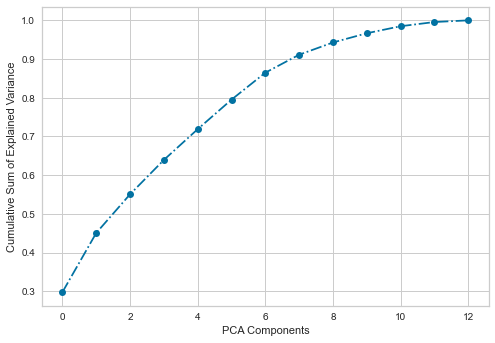

In [210]:
#Performing principle component analysis to find the most important components for variance
pca = PCA()
pca.fit(train_nopop)
#Finding the explained variance ratio of each component
evr = pca.explained_variance_ratio_
print(evr)
#Plotting the cumulative explained variance ratio to find the most important categories
plt.plot(list(range(0,len(evr))),evr.cumsum(), marker = "o", linestyle = "-.")
plt.ylabel("Cumulative Sum of Explained Variance")
plt.xlabel("PCA Components")
plt.show()

[0.29761294 0.1529111  0.10001229 0.08878691 0.07948695 0.07628656]


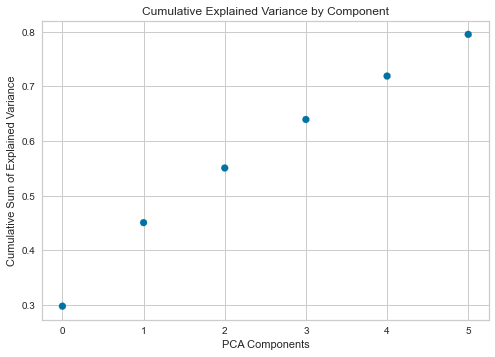

In [211]:
#Taking the categories that explain 80% of the variance and then fitting that to the training data for the clustering algorithm
pca_new = PCA(6)
pca_new.fit(train_nopop)
evr_new = pca_new.explained_variance_ratio_
print(evr_new)
plt.scatter(list(range(0,len(evr_new))),evr_new.cumsum(), marker = "o", linestyle = "-.")
plt.ylabel("Cumulative Sum of Explained Variance")
plt.xlabel("PCA Components")
plt.title("Cumulative Explained Variance by Component")
plt.show()

clustering_data = pca_new.transform(train_nopop)

### Finding Optimal Number of Clusters

To find the optimal number of clusters we find the within cluster sum of squares for each n clusters up to 25 and locate the point of maximum curvature on a graph of within cluster sum of squares against the number of clusters to find the ideal number of clusters for the data.

Once that is found we fit the whole data with this number of clusters.

Optimal Number of Clusters = 7


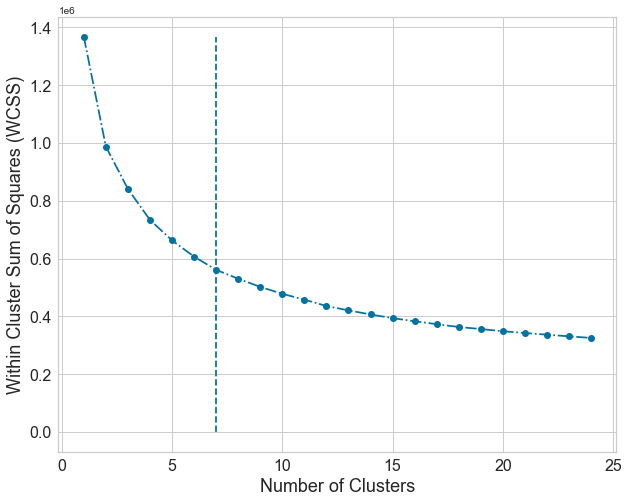

In [212]:
#Test all values of n from 1 to 25 to and find the within cluster sum of squares for each n
wcss = []
max_clusters = 25
for i in range(1, max_clusters):
    kmeans_pca = KMeans(n_clusters = i, init='k-means++', random_state=42)
    kmeans_pca.fit(clustering_data)
    wcss.append(kmeans_pca.inertia_)
      
#Using the kneed package locate the "elbow" (point of highest curvature) of the graph of wcss against n
#This will be the optimal number of clusters
n_clusters = KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', direction='decreasing').knee
print("Optimal Number of Clusters =", n_clusters)
    
#Display the graph of wcss against n to show where the elbow is
plt.figure(figsize=(10,8))
plt.plot(range(1, 25), wcss, marker='o', linestyle='-.')
plt.vlines(n_clusters, ymin=0, ymax=max(wcss), linestyles='dashed')
plt.xlabel('Number of Clusters', fontsize=18)
plt.ylabel('Within Cluster Sum of Squares (WCSS)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [213]:
total_data

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
0,0.70000,['Shirley Caesar'],0.478,159267.0,0.883,0.0,0.000,0.2380,-7.163,1.0,19.0,0.1640,152.217,0.839,1968.0
1,0.94100,['Jascha Heifetz'],0.357,469280.0,0.196,0.0,0.765,0.1310,-18.398,1.0,0.0,0.0443,130.683,0.327,1951.0
2,0.00482,['Max Coveri'],0.541,283833.0,0.931,0.0,NaN,0.0919,-5.484,1.0,64.0,0.0416,158.517,0.860,1998.0
3,0.08980,"['Ty Dolla $ign', 'Joe Moses']",0.750,187671.0,NaN,1.0,0.000,0.1090,-8.326,1.0,69.0,0.1170,105.008,0.711,2016.0
4,0.36300,['Bill Conti'],0.275,283427.0,0.438,0.0,0.926,0.1260,-16.191,0.0,44.0,0.0728,112.612,0.175,1979.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155733,0.00234,['Ulysse Riverside'],0.741,309677.0,0.642,0.0,0.204,0.0504,-9.472,1.0,0.0,0.0697,124.005,0.966,2020.0
155734,0.07490,"['BigBankCarti', 'Quickbandz', 'YPC Kool']",0.505,130351.0,NaN,1.0,0.000,0.1570,-11.324,1.0,0.0,0.2200,132.445,0.085,2020.0
155735,0.08520,['BigBankCarti'],0.673,123481.0,0.476,1.0,0.000,0.1300,-11.880,0.0,0.0,0.2940,140.102,0.950,2020.0
155736,0.07890,"['BigBankCarti', '3B Glel']",0.825,211226.0,NaN,1.0,0.000,0.0857,-7.314,0.0,0.0,0.4530,136.987,0.377,2020.0


### Clustering the Data

<a id='collabcluster'></a>

After we've found the optimal number of clusters we cluster the total song data, display the results of the clustering algorithm by plotting two principle components against each other and showing the clusters, and predict the clusters of the three artists.

In [214]:
#Using Kmeans clustering to cluster the data using the number of clusters determined above
kmeans_final = KMeans(n_clusters = 6, init='k-means++', random_state=42)
kmeans_final.fit(clustering_data)
#Finding the clusters of all the songs
labels = kmeans_final.predict(clustering_data)

In [215]:
#Forming the clustered song data array with the scaled data, the cluster labels, the actual year of release, and the popularity
clustered_song_data = train_nopop
clustered_song_data["Cluster"] = labels
clustered_song_data["year_actual"] = total_data["year"]
clustered_song_data["Popularity"] = total_data["popularity"]

In [216]:
clustered_song_data

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,year,explicit,mode,Cluster,year_actual,Popularity
0,0.525420,-0.326229,-0.502466,1.474875,-0.586243,0.145162,0.811583,0.318582,1.166033,1.189743,-0.322847,0.0,1.0,1,1968.0,19.0
1,1.160476,-1.013627,1.619773,-1.050008,1.709933,-0.446718,-1.163049,-0.336240,0.454383,-0.748470,-0.960649,0.0,1.0,3,1951.0,0.0
2,-1.306439,0.031673,0.350269,1.651286,-0.580446,-0.663002,1.106679,-0.351011,1.374234,1.269240,0.802687,0.0,1.0,1,1998.0,64.0
3,-1.082509,1.218997,-0.308022,0.439195,-0.586243,-0.568412,0.607177,0.061467,-0.394118,0.705190,1.478007,1.0,1.0,1,2016.0,69.0
4,-0.362604,-1.479467,0.347489,-0.160602,2.193181,-0.474376,-0.775153,-0.180330,-0.142823,-1.323877,0.089849,0.0,0.0,3,1979.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155733,-1.312974,1.167869,0.527187,0.589145,0.026071,-0.892563,0.405760,-0.197289,0.233690,1.670511,1.628078,0.0,1.0,1,2020.0,0.0
155734,-1.121772,-0.172842,-0.700415,0.196630,-0.586243,-0.302896,0.080257,0.624931,0.512613,-1.664579,1.628078,1.0,1.0,4,2020.0,0.0
155735,-1.094631,0.781562,-0.747444,-0.020944,-0.586243,-0.452249,-0.017463,1.029750,0.765659,1.609942,1.628078,1.0,0.0,1,2020.0,0.0
155736,-1.111232,1.645071,-0.146773,0.306152,-0.586243,-0.697298,0.785044,1.899564,0.662716,-0.559191,1.628078,1.0,0.0,1,2020.0,0.0


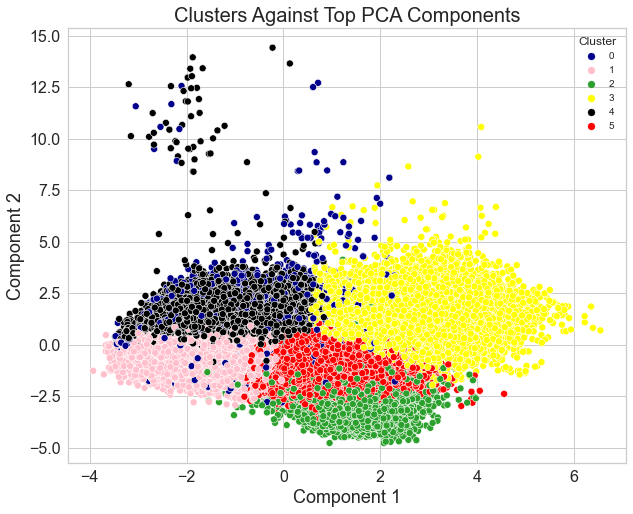

In [217]:
#Creating a dataframe of the data used in the clustering to show the clusters
clustering_data = pd.DataFrame(clustering_data)

#Plotting a scatter plot of the clusters against the first and second principle components
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(clustering_data[0], clustering_data[1], hue=clustered_song_data['Cluster'], palette = ['darkblue', 'pink', 'tab:green', 'yellow', 'black',"red"])
plt.title('Clusters Against Top PCA Components', fontsize=20)
plt.xlabel("Component 1", fontsize=18)
plt.ylabel("Component 2", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

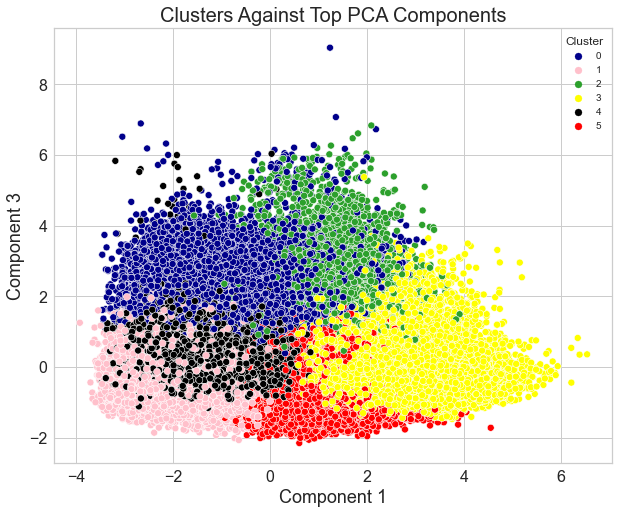

In [218]:
#Plotting the same graph but against the first and third components
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(clustering_data[0], clustering_data[2], hue=clustered_song_data['Cluster'], palette = ['darkblue', 'pink', 'tab:green', 'yellow', 'black',"red"])
plt.title('Clusters Against Top PCA Components', fontsize=20)
plt.xlabel("Component 1", fontsize=18)
plt.ylabel("Component 3", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [219]:
#Transforming the data for the predicted artists using the same PCA and finding their cluster labels
artist_genre_pca = pca_new.transform(predict_df)
artist_genres = kmeans_final.predict(artist_genre_pca)
artist_genres

array([4, 4, 4])

### Selecting Artists with Songs in the Same Cluster as the Predicted Artist from the last two Years

Before selecting any of the artists I have to clean the artist column (as in section A finding unique artists) so each artist on a track is in a list of artists for that track, I can then select all songs in the same genre as Elliot Tempest (predicted successful artist).

From there I select only songs that were released in the last 2 years, find their artists, then for each unique artist calculate the mean popularity over the last two years, the mean number of artists they work with per track, and the number of songs in the genre that they have.


In [220]:
#Cleaning the artist column by reformatting so first aka main artist can be extracted
artists = total_data["artists"]

artists_clean = []

#For each of the artists values of the total data we:
#- remove the brackets surrounding the names, 
#- split the names up by the comma and space,
#- add this array of names to the total array of artist names
#- replace the old artists value in the clustered song data with the array of artist names
for i in artists:
    x = i.replace("[","")
    x = x.replace("]","")
    x = x.split(", ")
    artists_clean.append(x)

clustered_song_data["Artists"] = artists_clean

In [221]:
#Extracting all songs with the same genre as the predicted most successful artist (Elliot Tempest)
clustered_same_genre = clustered_song_data.iloc[lambda clustered_song_data: clustered_song_data["Cluster"].values == artist_genres[0]]

In [222]:
#Now extracting all songs that are in the same genre from the last two years
clustered_same_genre_recent  = clustered_same_genre.iloc[lambda clustered_same_genre: clustered_same_genre["year_actual"].values > 2018]

In [223]:
#Extracting the main (first listed) artist for each of the recent, same genre songs
artists = clustered_same_genre_recent["Artists"]

artists_unique = []

for i in artists:
    main_artist = i[0]
    artists_unique.append(main_artist)

#Finding the unique artists among this group
artists_unique = pd.unique(artists_unique)

In [224]:
#Reset the index of the recent, same genre songs
clustered_same_genre_recent = clustered_same_genre_recent.reset_index(drop=True)
#Create an array with an array inside for each artist with elements: 
#- the artist, 
#- the avg popularity over the last two years,
#- the mean number of people they've worked with over the last two years per song
artist_pop_collab = []
for i in range(0,len(artists_unique)):
    index = []
    recent_songs = pd.DataFrame(columns = features)
    for j in range(0, len(clustered_same_genre_recent["Artists"].values)):
        if clustered_same_genre_recent["Artists"].values[j][0] == artists_unique[i]:
            index.append(j)
    recent_songs = clustered_same_genre_recent.iloc[index]
    mean = np.mean([len(artists) for artists in recent_songs["Artists"].values])
    temp = [artists_unique[i], np.mean(recent_songs["Popularity"].values), len(recent_songs["Popularity"].values), mean] 
    artist_pop_collab.append(temp)

In [225]:
#Create a dataframe with all the information extracted above for use in recommending a collaboration
collaboration_df = pd.DataFrame(data = artist_pop_collab, columns = ["Artist", "Popularity", "Songs", "Mean Artists"])

In [226]:
#Sort this collaboration dataframe by popularity and reset the index
collaboration_df = collaboration_df.sort_values(by=["Popularity"], ascending = False)
collaboration_df.reset_index(drop=True, inplace = True)
collaboration_df

,Artist,Popularity,Songs,Mean Artists
0,'Ritt Momney',89.0,1,1.0
1,'Robin Schulz',87.0,1,2.0
2,'MEDUZA',87.0,2,2.5
3,'Surf Mesa',86.0,1,2.0
4,'Arizona Zervas',86.0,1,1.0
...,...,...,...,...
1182,'Nu Rock City',0.0,3,1.0
1183,'Amezquita',0.0,1,1.0
1184,'Nik Finn',0.0,2,1.0
1185,'Wolvero',0.0,1,2.0


In [227]:
#Only consider artists with multiple songs in this genre
multiple_songs = collaboration_df.loc[collaboration_df["Songs"] > 1]
multiple_songs.reset_index(drop=True, inplace=True)
multiple_songs

,Artist,Popularity,Songs,Mean Artists
0,'MEDUZA',87.0,2,2.5
1,'J Balvin',86.0,2,3.0
2,'Shawn Mendes',84.5,4,1.5
3,'Justin Bieber',84.5,2,1.5
4,'Conan Gray',83.0,3,1.0
...,...,...,...,...
484,'Manuel Le Saux',0.0,2,1.0
485,'Kialph',0.0,2,1.0
486,'Nu Rock City',0.0,3,1.0
487,'Nik Finn',0.0,2,1.0


### Combining Average Song Attributes to Find Projected Popularity of Collaboration

I first take the top 25 most popular artists from the dataframe above, then calculate the mean characteristics of all their songs to get a mean song for each artist.

I then combine this with the characteristics of the average Elliot Tempest (predicted successful artist) song  to get the potential characteristics of a collaboration.

In [228]:
#Take the top 25 most popular artists satisfying all the criteria above
tested_artists = multiple_songs.iloc[0:25]

In [229]:
tested_artists

,Artist,Popularity,Songs,Mean Artists
0,'MEDUZA',87.000000,2,2.500000
1,'J Balvin',86.000000,2,3.000000
2,'Shawn Mendes',84.500000,4,1.500000
3,'Justin Bieber',84.500000,2,1.500000
4,'Conan Gray',83.000000,3,1.000000
5,'Bad Bunny',82.727273,11,1.454545
6,'Lewis Capaldi',81.750000,4,1.000000
7,'Harry Styles',81.666667,6,1.000000
8,'Billie Eilish',81.250000,4,1.000000
9,'Ava Max',81.000000,2,1.000000


In [230]:
#Creating a dictionary of all the columns where we get mean characteristics of these artists songs
mean_tested_artists_characteristics = {"acousticness":  [],       
                                       "danceability": [], 
                                       "duration_ms": [], 
                                       "energy": [],                     
                                       "instrumentalness": [],  
                                       "liveness": [], 
                                       "loudness": [], 
                                       "speechiness": [], 
                                       "tempo": [], 
                                       "valence": [],
                                       "year": [],
                                       "explicit": [],
                                       "mode": [],
                                       "Artists": []
                                      }
#Creating blank dataframe using the columns above
mean_tested_artists_characteristics = pd.DataFrame(mean_tested_artists_characteristics)

#For each artist out of the top 25 we find the mean attributes of all of their songs (or mode / median where appropriate)
for i in range(0,len(tested_artists["Artist"].values)):
    index = []
#If the main artist is the one in question then add that song into the group of songs to take the average from
    for j in range(0, len(clustered_song_data["Artists"].values)):
        if tested_artists["Artist"].values[i] == clustered_song_data["Artists"].values[j][0]:
            index.append(j)
#Create the temporaray array of all the artists songs
    artist_songs = clustered_song_data.iloc[index]
    mean_current_artist = [artist_songs["acousticness"].mean(),
                           artist_songs["danceability"].mean(),
                           artist_songs["duration_ms"].mean(),
                           artist_songs["energy"].mean(),
                           artist_songs["instrumentalness"].mean(),
                           artist_songs["liveness"].mean(),
                           artist_songs["loudness"].mean(),
                           artist_songs["speechiness"].mean(),
                           artist_songs["tempo"].median(),
                           artist_songs["valence"].mean(),
                           artist_songs["year"].mean(),
                           artist_songs["explicit"].mode(),
                           artist_songs["mode"].mode(),
                           artist_songs["Artists"].values[0][0]]
#Add the mean characteristics for this artist onto the dataframe for all the artists
    mean_tested_artists_characteristics.loc[i] = mean_current_artist

In [231]:
#Extracting the mean characeteristics of the chosen artist (Elliot Tempest)
recommended_artist = predict_df.iloc[0]

In [232]:
#Instantiating a new dataframe with all the mean characteristics to find the projected popularity of the collaboration
collaboration_df = mean_tested_artists_characteristics

In [233]:
#Finding the mean of all the numerical values and then saying that the categorical variables are the same as the chosen artist's on average
for i in range(0, len(mean_tested_artists_characteristics.index)):
    collaboration_df.loc[i] = (mean_tested_artists_characteristics.iloc[i] + recommended_artist)/2
#Removing the artist column so it is in the correct form for using our prediction models
collaboration_df = collaboration_df.drop(["Artists"], axis=1)
collaboration_df["explicit"] = recommended_artist["explicit"]
collaboration_df["mode"] = recommended_artist["mode"]

### Predicting Popularity of Collaboration

I now predict the collaboration song's popularity and I call this the collab score.

In [234]:
#Adding the predicted popularity scoure using the random forest algorithm
collaboration_score = predict_model(et_final, data = collaboration_df)
collaboration_score

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,year,explicit,mode,Label
0,-0.897365,-0.099936,-0.001970,0.842123,-0.459199,0.214307,0.954210,-0.313173,0.284418,-0.033628,1.634331,1,1,47
1,-0.945868,0.165844,0.056802,1.048116,-0.540361,0.271318,1.159045,-0.077829,-0.031535,0.175314,1.598284,1,1,42
2,-0.808471,-0.095794,-0.024270,0.881631,-0.539661,0.132672,1.122648,-0.195495,0.265820,0.100997,1.613227,1,1,52
3,-0.797455,-0.097822,0.032366,0.885662,-0.541107,0.312874,1.050994,-0.209894,0.299951,-0.058002,1.515866,1,1,47
4,-0.456409,-0.424428,0.032926,0.652306,-0.541213,0.317668,0.966751,-0.245429,0.019458,-0.288144,1.625398,1,1,53
5,-0.772379,0.178384,-0.002337,0.875695,-0.540753,0.191701,1.102266,-0.109569,0.151037,-0.152853,1.630209,1,1,55
6,-0.215980,-0.193537,-0.010841,0.530498,-0.541220,0.139828,1.101620,-0.304394,0.049961,-0.465634,1.625398,1,1,57
7,-0.764269,-0.367525,0.109008,0.777995,-0.506003,0.282073,1.071327,-0.316304,0.085198,-0.264477,1.610762,1,1,50
8,-0.306308,-0.184364,-0.015217,0.312417,-0.398141,0.321236,0.554526,-0.060033,0.217215,-0.522152,1.611664,1,1,57
9,-0.901804,-0.001466,-0.114001,0.919915,-0.541220,0.193102,1.236974,-0.292658,0.379876,-0.119434,1.646837,1,1,55


### Collating Final List of Artists for Collaboration

<a id='collabevaluate'></a>

I then take any artist which produces a collab score of greater than 50 and add them to the final artists and calculate the cost of each of the final artists.

This is the list of suggested artists for collaboration and the company could use its own knowledge to pick one of them based on its budget / inside knowledge. I also give a suggested high, medium, and low budget option.

In [235]:
#Creating the top 25 artists for collaboration dataframe
#Only accepting collaborations that have a projected popularity of above 50
#- adding the collaboration score and the cost function value to the dataframe
#- sorting by popularity of the artist as that is the known quantity
final_artists = tested_artists.iloc[collaboration_score.loc[collaboration_score["Label"] > 50].index]
final_artists["Collab Score"] = collaboration_score["Label"]
final_artists["Cost"] = final_artists["Popularity"]/(final_artists["Mean Artists"].values*1.3)
final_artists = final_artists.sort_values(by=["Popularity"], ascending = False)
final_artists

,Artist,Popularity,Songs,Mean Artists,Collab Score,Cost
2,'Shawn Mendes',84.500000,4,1.500000,52,43.333333
4,'Conan Gray',83.000000,3,1.000000,53,63.846154
5,'Bad Bunny',82.727273,11,1.454545,55,43.750000
6,'Lewis Capaldi',81.750000,4,1.000000,57,62.884615
8,'Billie Eilish',81.250000,4,1.000000,57,62.500000
9,'Ava Max',81.000000,2,1.000000,55,62.307692
10,'Dan + Shay',81.000000,2,1.500000,53,41.538462
11,'BLACKPINK',79.500000,2,1.000000,53,61.153846
12,'JP Saxe',79.500000,2,1.500000,54,40.769231
14,'Tate McRae',79.400000,5,1.200000,58,50.897436


## Final Artist for Collaboration

Looking at the top 25 shortlisted artists, Lewis Capaldi looks to be a good choice to collaborate with. This is assuming Elliot Tempest is an English speaking artist so another English speaking artist would be the best choice. The collaboration score for Lewis Capaldi is the highest albeit he has the highest cost function. If they wanted a lower cost alternative Sia has a very low cost function but not as good of a popularity or a collab score, and a middle ground could be Shawn Mendes.

## Affect of Month and Title Size

<a id='monthtitle'></a>

I decided to go for a fairly simple way of suggesting a release month and aspects of a title as I was running out of time and could not refit my models with this data.

For the release month I decided to attempt to plot release month against mean popularity of songs released that month over the last 30 years. There was a definite highest month in October indicating that would be the best month to release in.

For the title I decided to plot length of title against popularity and length of title against mean popularity at that length. I also plotted number of words in the title against popularity and mean popularity for that number of words. Both of these metrics showed a clear decrease in popularity as titles increased with any high numbers further in the data due to outliers and were not representative of the true trend.

In [236]:
#Retrieving all the release dates and converting to datetime format
datetime_variables = spotify_data_nans[["release_date"]]
datetime_variables["release_date"] = pd.to_datetime(datetime_variables["release_date"], infer_datetime_format = True)
#Replacing the release_date column with the months of release for each song
datetime_variables["release_date"] = pd.DatetimeIndex(datetime_variables["release_date"]).month
datetime_variables

,release_date
0,1
1,1
2,1
3,1
4,10
...,...
174384,12
174385,1
174386,12
174387,1


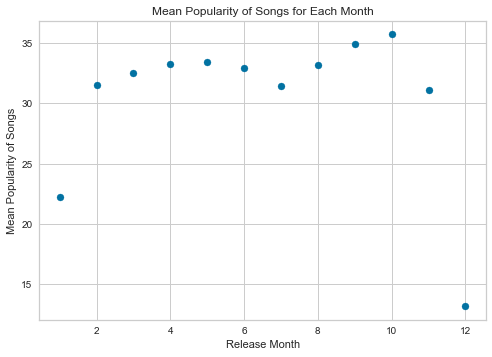

In [237]:
#Retrieving all the data along with the release months of each song
release_date_df = spotify_data_nans
release_date_df["release_month"] = datetime_variables["release_date"]
#Disregarding any NaN values for popularity as they won't be helpful
release_date_df = release_date_df.dropna(subset=["popularity"])

#Finding the average popularity for each month by finding all the songs released in that month and then taking the mean of the popularity
mean_pop = []
for i in range(1, 13):
    month = release_date_df.loc[release_date_df["release_month"] == i]
    mean_pop.append(month["popularity"].mean())

#Plotting this data
plt.scatter(x = range(1,13), y=mean_pop)
plt.xlabel("Release Month")
plt.ylabel("Mean Popularity of Songs")
plt.title("Mean Popularity of Songs for Each Month")
plt.show()

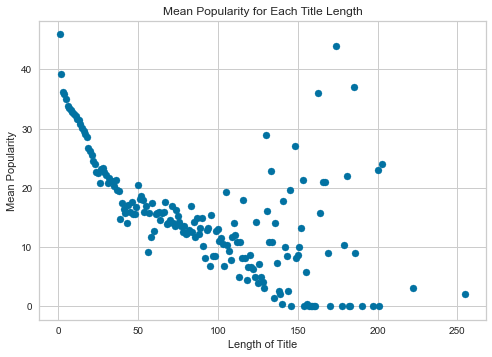

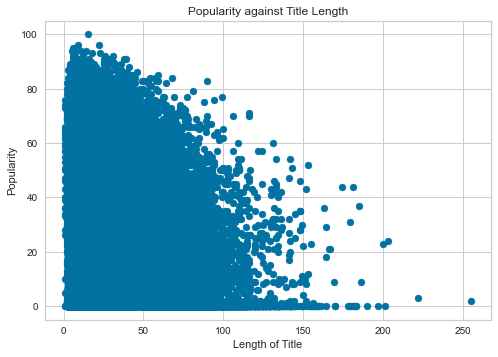

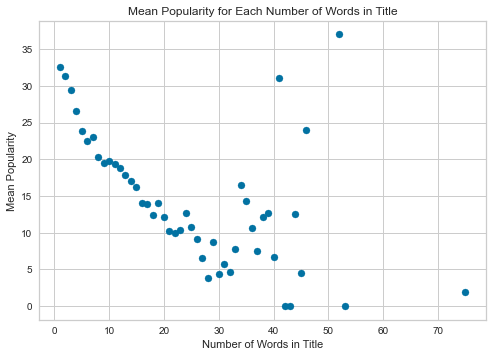

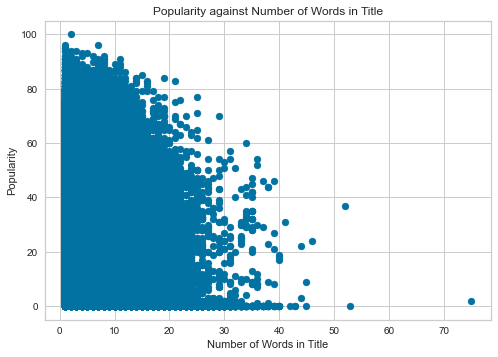

In [238]:
#Find title length and number of words in the title for each title 
release_date_df["title_length"] = release_date_df["name"].apply(lambda title: len(title))
release_date_df["word_number"] = release_date_df["name"].apply(lambda title : len(nltk.word_tokenize(title)))

#Find the average popularity of songs for a specific title length by calculating this mean for every title length
mean_pop = []
for i in pd.unique(release_date_df["title_length"].values):
    length = release_date_df.loc[release_date_df["title_length"] == i]
    mean_pop.append(length["popularity"].mean())

#Find the average popularity of songs for a specific number of words in the title by calculating the mean for each number of words   
mean_pop2 = []
for i in pd.unique(release_date_df["word_number"].values):
    num = release_date_df.loc[release_date_df["word_number"] == i]
    mean_pop2.append(num["popularity"].mean())
    
#Plotting this data on graphs
plt.scatter(x = pd.unique(release_date_df["title_length"].values), y = mean_pop)
plt.xlabel("Length of Title")
plt.ylabel("Mean Popularity")
plt.title("Mean Popularity for Each Title Length")
plt.show()

plt.scatter(x = release_date_df["title_length"], y = release_date_df["popularity"])
plt.xlabel("Length of Title")
plt.ylabel("Popularity")
plt.title("Popularity against Title Length")
plt.show()

plt.scatter(x = pd.unique(release_date_df["word_number"].values), y = mean_pop2)
plt.xlabel("Number of Words in Title")
plt.ylabel("Mean Popularity")
plt.title("Mean Popularity for Each Number of Words in Title")
plt.show()

plt.scatter(x = release_date_df["word_number"].values, y = release_date_df["popularity"])
plt.xlabel("Number of Words in Title")
plt.ylabel("Popularity")
plt.title("Popularity against Number of Words in Title")
plt.show()